# CA4 - Liver Disease Prediction
### Jony Karmakar

### Imports

In [206]:
# Importing Libaries
# ======================
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor

from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV 
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


### Reading data

In [87]:
# Loading the dataset 
# ======================
df_train = pd.read_csv('train.csv', index_col=0)
df_test = pd.read_csv('test.csv', index_col=0)

### Data exploration and visualisation

In [73]:
#Cheking for missing data
# =======================
null_counts = df_train.isnull().sum().sum()
print(f'Total Missing values: {null_counts}' )

Total Missing values: 0


In [74]:
# Checking the info of the dataset
# ================================
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 703 entries, 0 to 702
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       703 non-null    int64  
 1   AFP (ng/mL)                 703 non-null    float64
 2   ALP (U/L)                   703 non-null    float64
 3   ALT (U/L)                   703 non-null    float64
 4   AST (U/L)                   703 non-null    float64
 5   Age                         703 non-null    int64  
 6   Albumin (g/dL)              703 non-null    float64
 7   Alcohol_Use (yes/no)        703 non-null    object 
 8   Bilirubin (mg/dL)           703 non-null    float64
 9   CRP (mg/L)                  703 non-null    float64
 10  Diabetes (yes/no)           703 non-null    object 
 11  Fibroscan (kPa)             703 non-null    float64
 12  GGT (U/L)                   703 non-null    float64
 13  Gender                      703 non-null

In [75]:
# Printing the first 10 rows of the dataframe with head(10)
# =========================================================
df_train.head(10)

,index,AFP (ng/mL),ALP (U/L),ALT (U/L),AST (U/L),Age,Albumin (g/dL),Alcohol_Use (yes/no),Bilirubin (mg/dL),CRP (mg/L),...,Serum_Creatinine (mg/dL),Serum_Iron (μg/dL),Serum_Lactate (mmol/L),Serum_Urea (mg/dL),Serum_Zinc (μg/dL),TIBC (μg/dL),Transferrin_Saturation (%),WBC (10^9/L),pH,Diagnosis
0,1124,13.571425,1653.138489,40.405592,45.598427,4,4.477126,yes,0.541997,1.002121,...,2.569954,97.242495,2.923385,26.696110,96.124260,315.439318,30.827639,4.180007,6.163600,Healthy
1,1188,13.649342,1940.518305,21.336986,34.064095,55,3.190724,yes,1.199063,0.582746,...,3.024642,128.597676,2.719966,23.021218,50.554650,268.492437,47.896200,4.590995,5.244266,Cirrhosis
2,530,10.898943,1557.369920,29.665496,16.044488,30,4.506351,no,0.740952,1.670375,...,2.219844,98.026938,3.267757,20.123808,82.900681,312.107620,31.408057,4.524580,5.769592,Healthy
3,686,13.872275,1273.840525,142.418649,64.204257,0,3.665655,yes,1.939879,1.220646,...,1.704282,63.105133,1.937625,36.436855,72.360010,182.506010,34.577016,4.234483,5.982228,Drug-induced Liver Injury
4,296,10.102457,1461.622515,22.437303,23.940205,59,4.005109,no,0.769535,0.139863,...,2.656926,89.966713,1.979801,20.036074,63.216136,212.261519,42.384844,4.306892,4.837404,Healthy
5,663,5.824125,1921.018155,83.136847,39.372095,64,3.471696,no,0.557283,8.021424,...,2.770285,96.542657,4.784693,27.760083,80.140859,304.210829,31.735444,4.275489,5.187919,Fatty Liver Disease
6,40,12.476249,2182.137388,97.396622,98.221842,29,4.112928,no,1.670063,1.209236,...,2.801148,152.299112,1.687116,7.641927,70.282273,341.402911,44.609787,8.069525,7.183443,Hepatitis
7,889,11.157910,1804.807405,25.813858,59.671478,34,3.739201,yes,0.549854,0.980465,...,1.855184,72.934571,2.610542,16.227916,85.302620,201.170284,36.255141,4.693278,7.304284,Fatty Liver Disease
8,785,9.174636,1229.834674,27.789897,37.531030,3,4.359691,yes,0.749890,3.311809,...,3.953037,125.110690,2.343232,18.905484,81.647554,296.340915,42.218500,4.526654,6.785159,Healthy
9,1171,10.889718,1314.998314,33.851749,22.029857,50,3.581977,yes,0.833413,1.065233,...,2.329074,40.899839,1.986068,20.626322,62.711051,339.683427,12.040575,4.393664,5.718308,Healthy


In [76]:
# Dropping the first column
# ==========================
#df_train = df_train.drop('index', axis=1)


In [77]:
# Shwowing descriptive statistics of the dataset
# ==============================================
df_train.describe()

,AFP (ng/mL),ALP (U/L),ALT (U/L),AST (U/L),Age,Albumin (g/dL),Bilirubin (mg/dL),CRP (mg/L),Fibroscan (kPa),GGT (U/L),...,Serum_Copper (μg/dL),Serum_Creatinine (mg/dL),Serum_Iron (μg/dL),Serum_Lactate (mmol/L),Serum_Urea (mg/dL),Serum_Zinc (μg/dL),TIBC (μg/dL),Transferrin_Saturation (%),WBC (10^9/L),pH
count,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,...,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000
mean,23.804227,1624.337402,58.262199,46.855946,27.206259,4.155568,1.056841,2.021190,8.899789,347.457426,...,105.754889,2.901900,105.901892,2.867523,21.440875,78.021500,288.708468,38.220427,5.000254,6.072044
std,54.938736,517.367426,36.372428,30.838523,23.632185,0.432317,0.617223,2.638333,3.822241,371.157528,...,26.159403,0.647559,33.699054,0.936050,6.946169,15.826557,54.223207,15.438507,2.025527,0.642783
min,-22.836893,546.609117,-14.313734,-16.215535,0.000000,2.625845,0.130291,0.075035,2.323530,17.056568,...,30.099096,1.525736,8.328732,0.711997,7.641927,34.170231,102.896996,2.496813,4.129884,4.416868
25%,8.029213,1229.735749,29.939330,24.163363,5.000000,3.880943,0.634089,0.651623,6.273365,131.695741,...,88.632128,2.441051,84.737590,2.211484,16.422281,66.617374,248.832647,28.598082,4.243197,5.724293
50%,10.195074,1553.771408,48.857238,38.720602,23.000000,4.166995,0.801903,1.238123,7.966800,244.400101,...,102.842960,2.844621,104.670558,2.700933,20.668951,78.024893,290.278094,35.617342,4.331605,6.085019
75%,12.656547,1931.433883,84.583900,70.023374,45.000000,4.437957,1.396853,2.449216,10.588808,419.660403,...,118.722674,3.275906,125.937089,3.393898,25.096926,88.452369,326.508987,46.630605,4.762898,6.485114
max,449.925304,3769.332343,178.226798,154.173314,86.000000,5.447072,3.712815,32.356076,26.691648,3426.981860,...,227.617474,5.729147,223.915730,8.010270,51.875943,120.279580,484.581225,156.858874,21.195702,8.368522


### Histogram

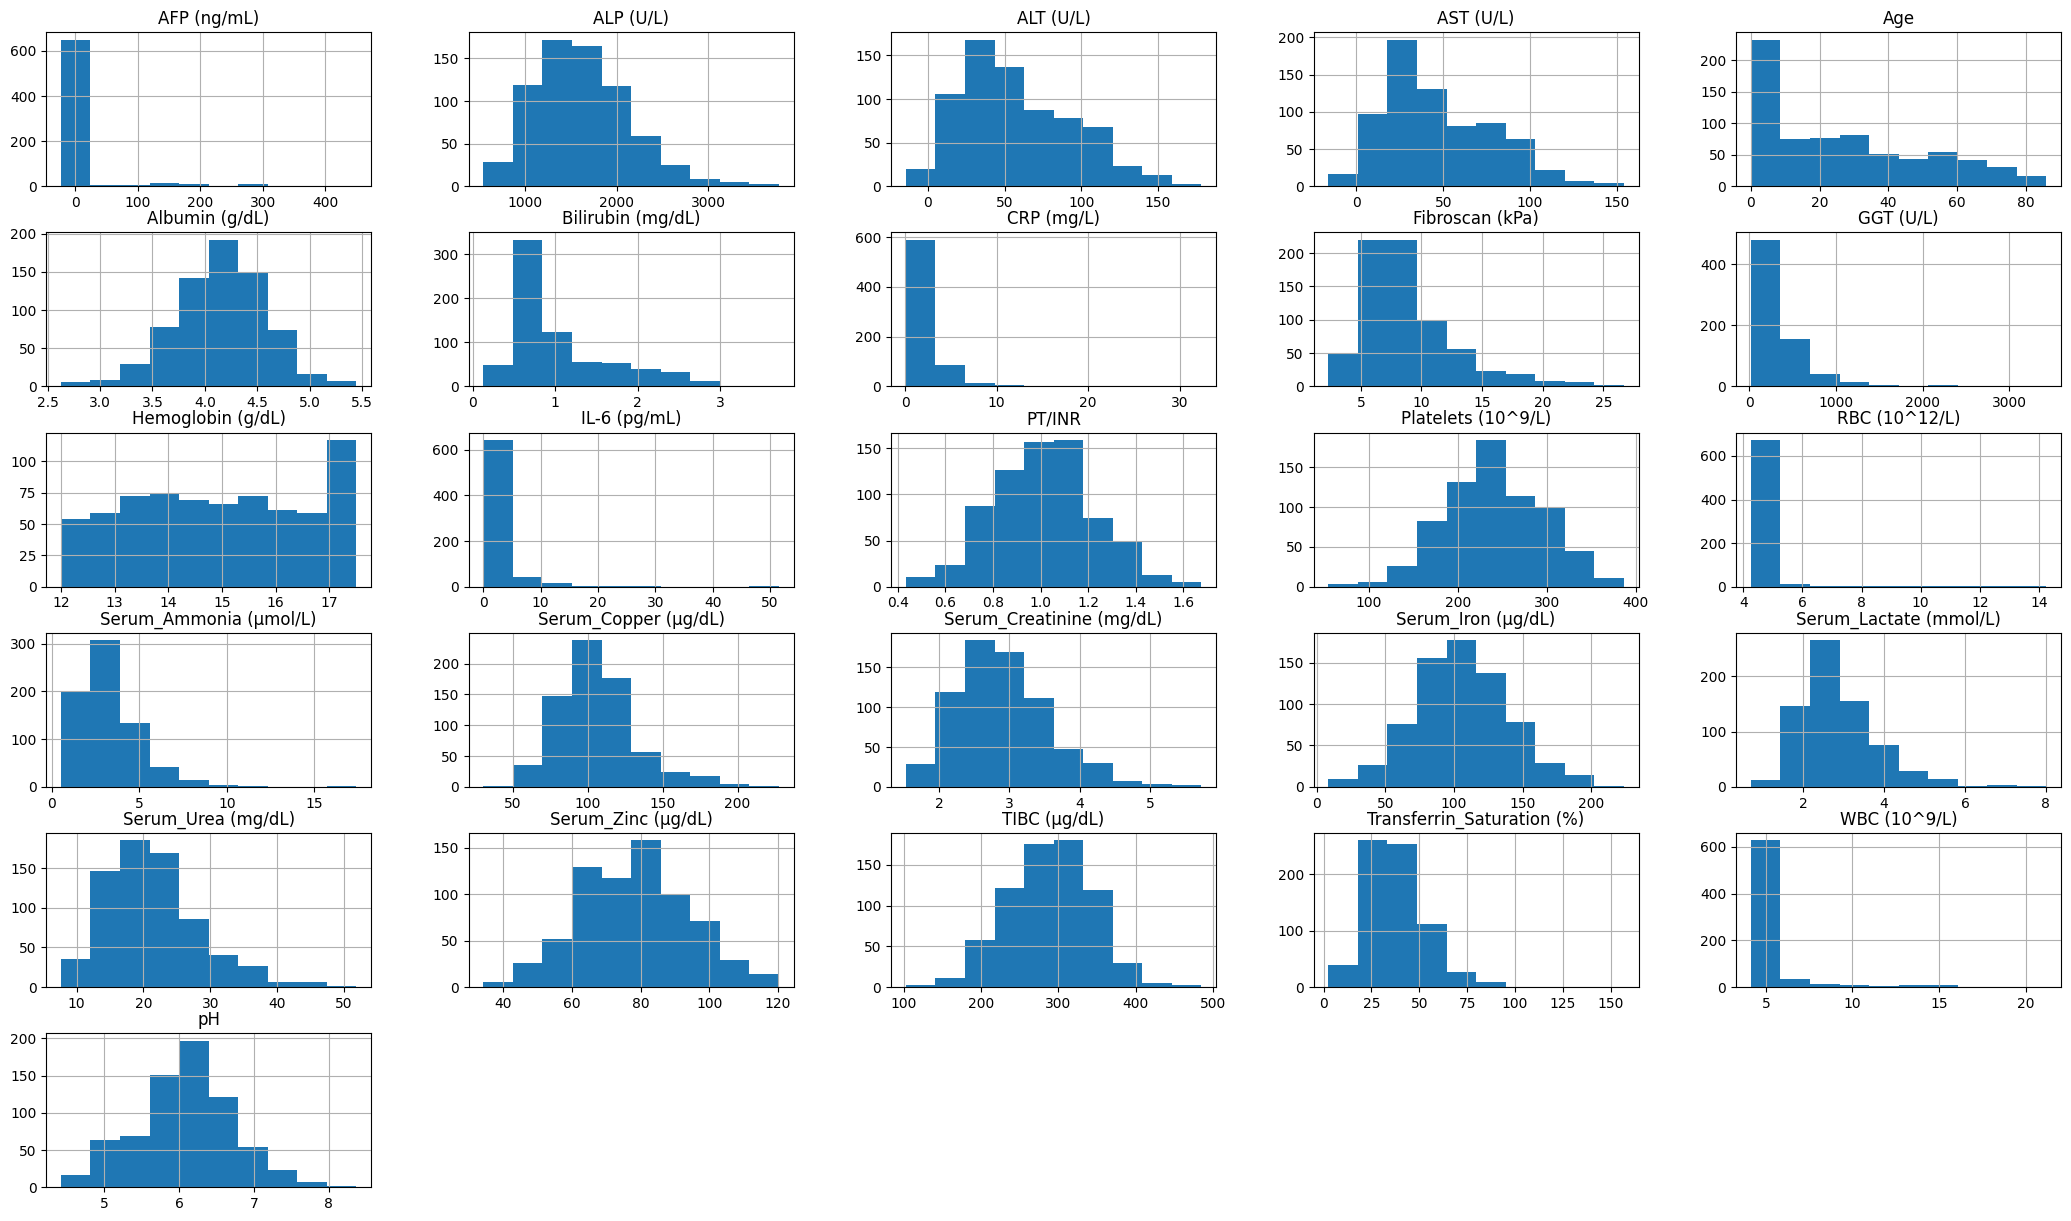

In [78]:
# Plotting histograms for all columns in the dataset
# ==================================================
df_train.hist(bins=10, figsize=(26, 15))
plt.show()


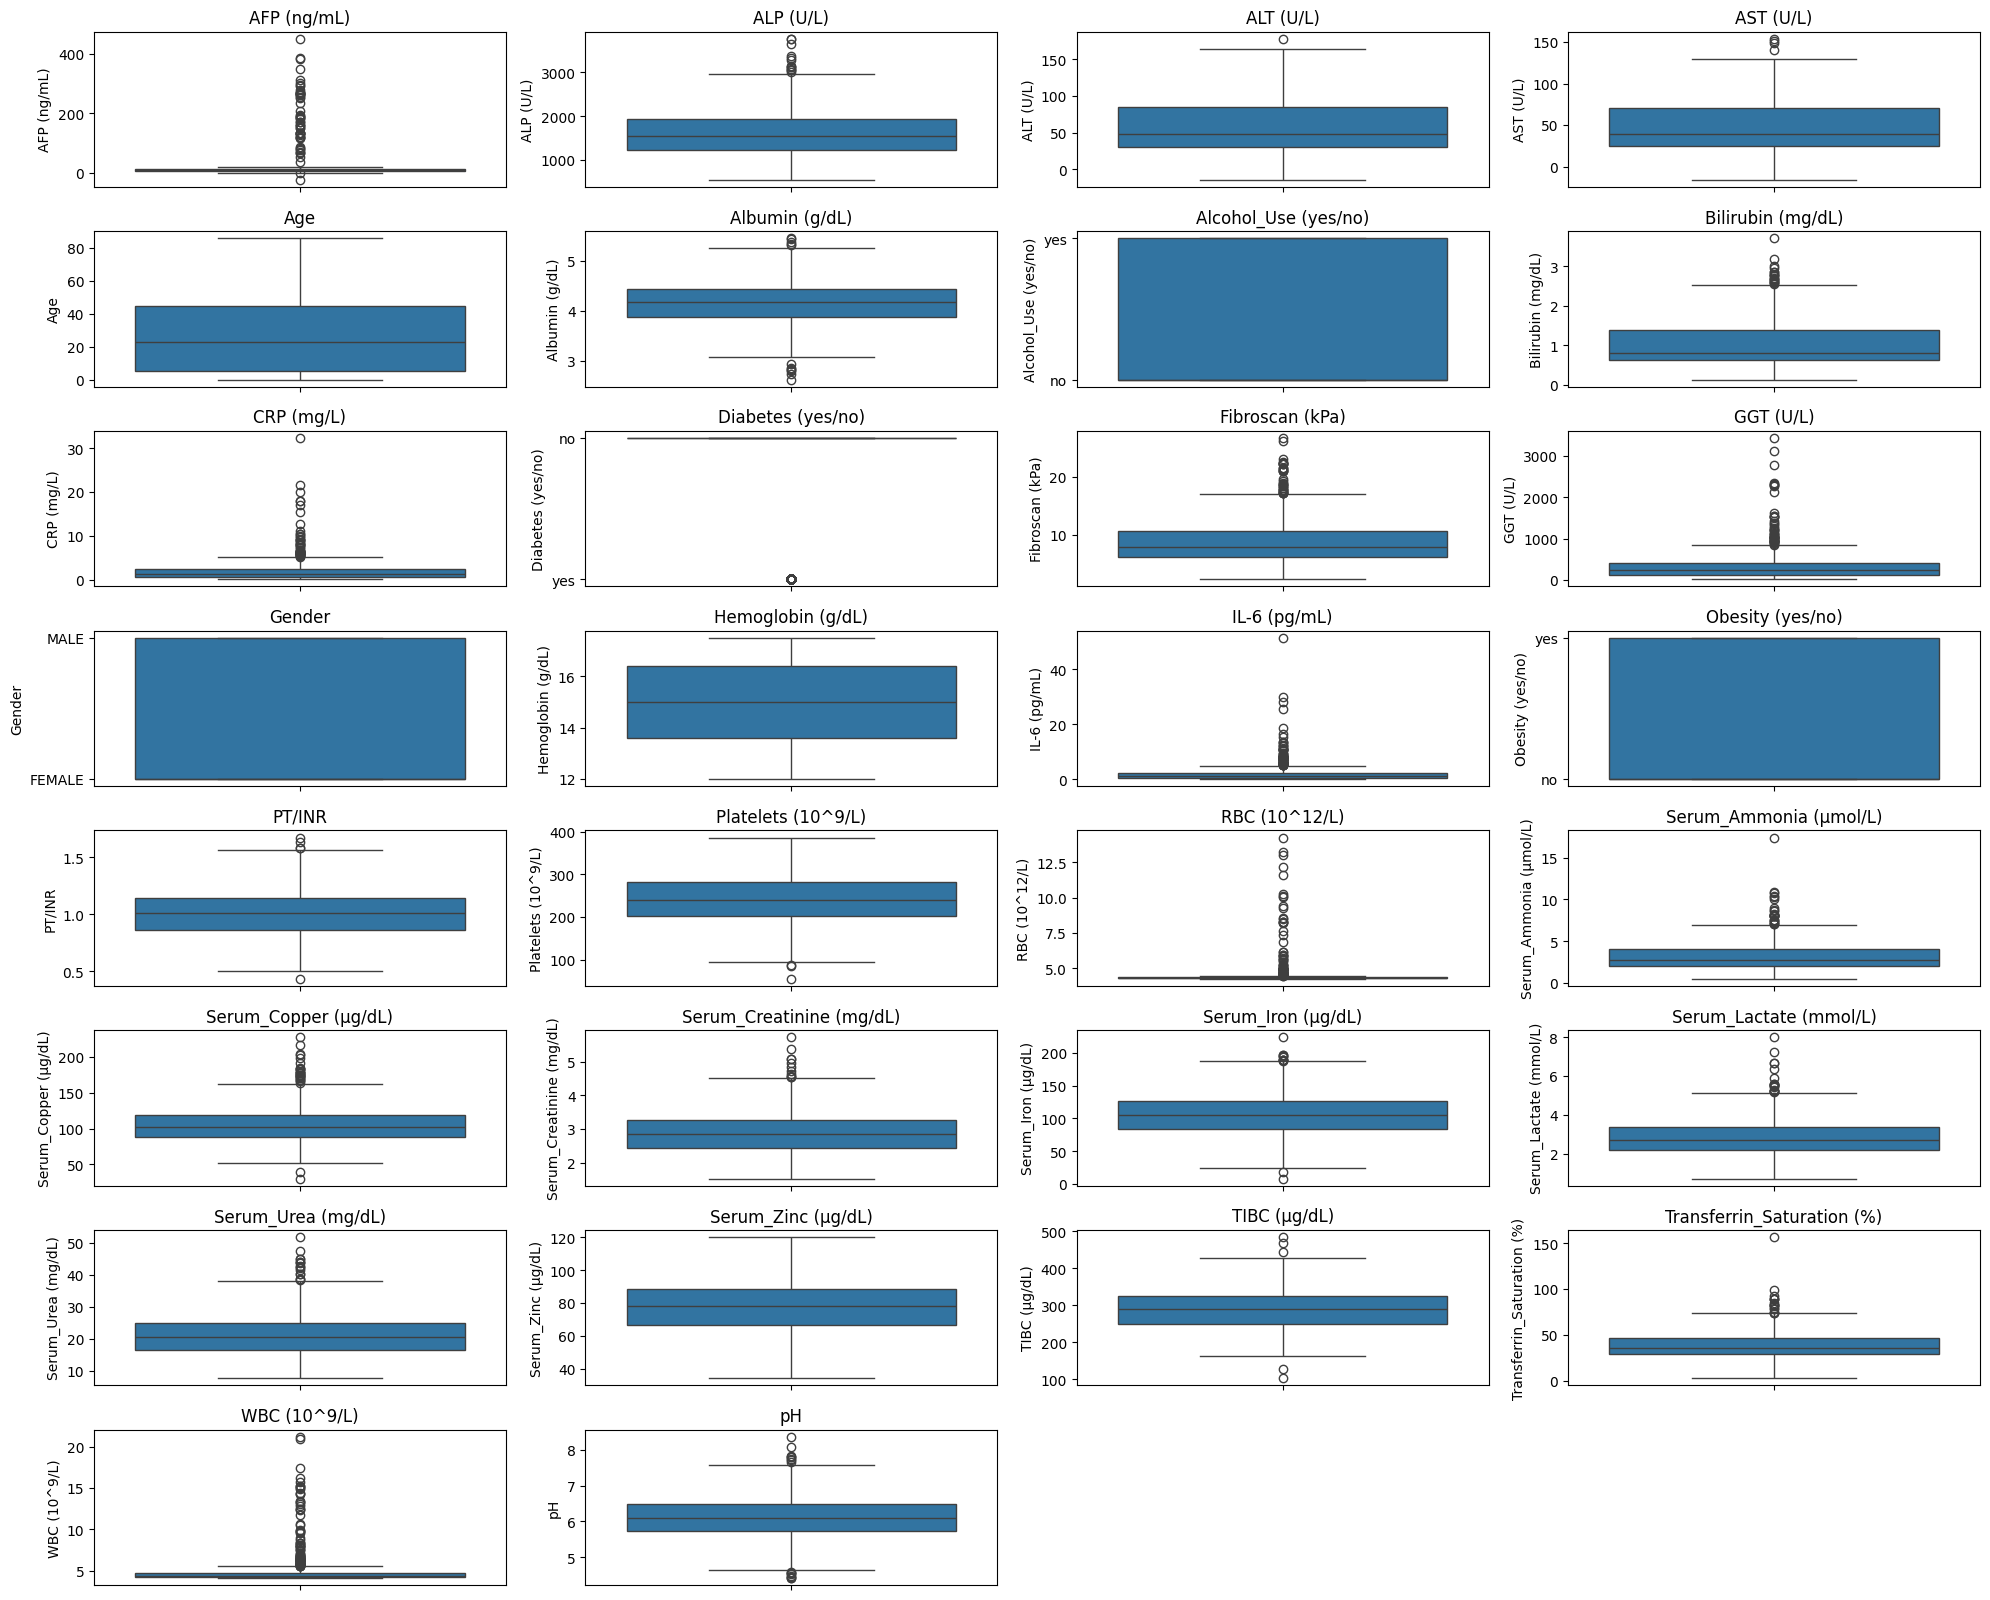

In [43]:
# Removing the target variable
# =============================
features = df_train.columns[:-1]

plt.figure(figsize=(20, 60))

for i, column in enumerate(features):
    plt.subplot(len(features), 4, i + 1)
    sns.boxplot(y=df_train[column])
    plt.title(column)
    plt.tight_layout()

plt.show()

#### Violin Plots

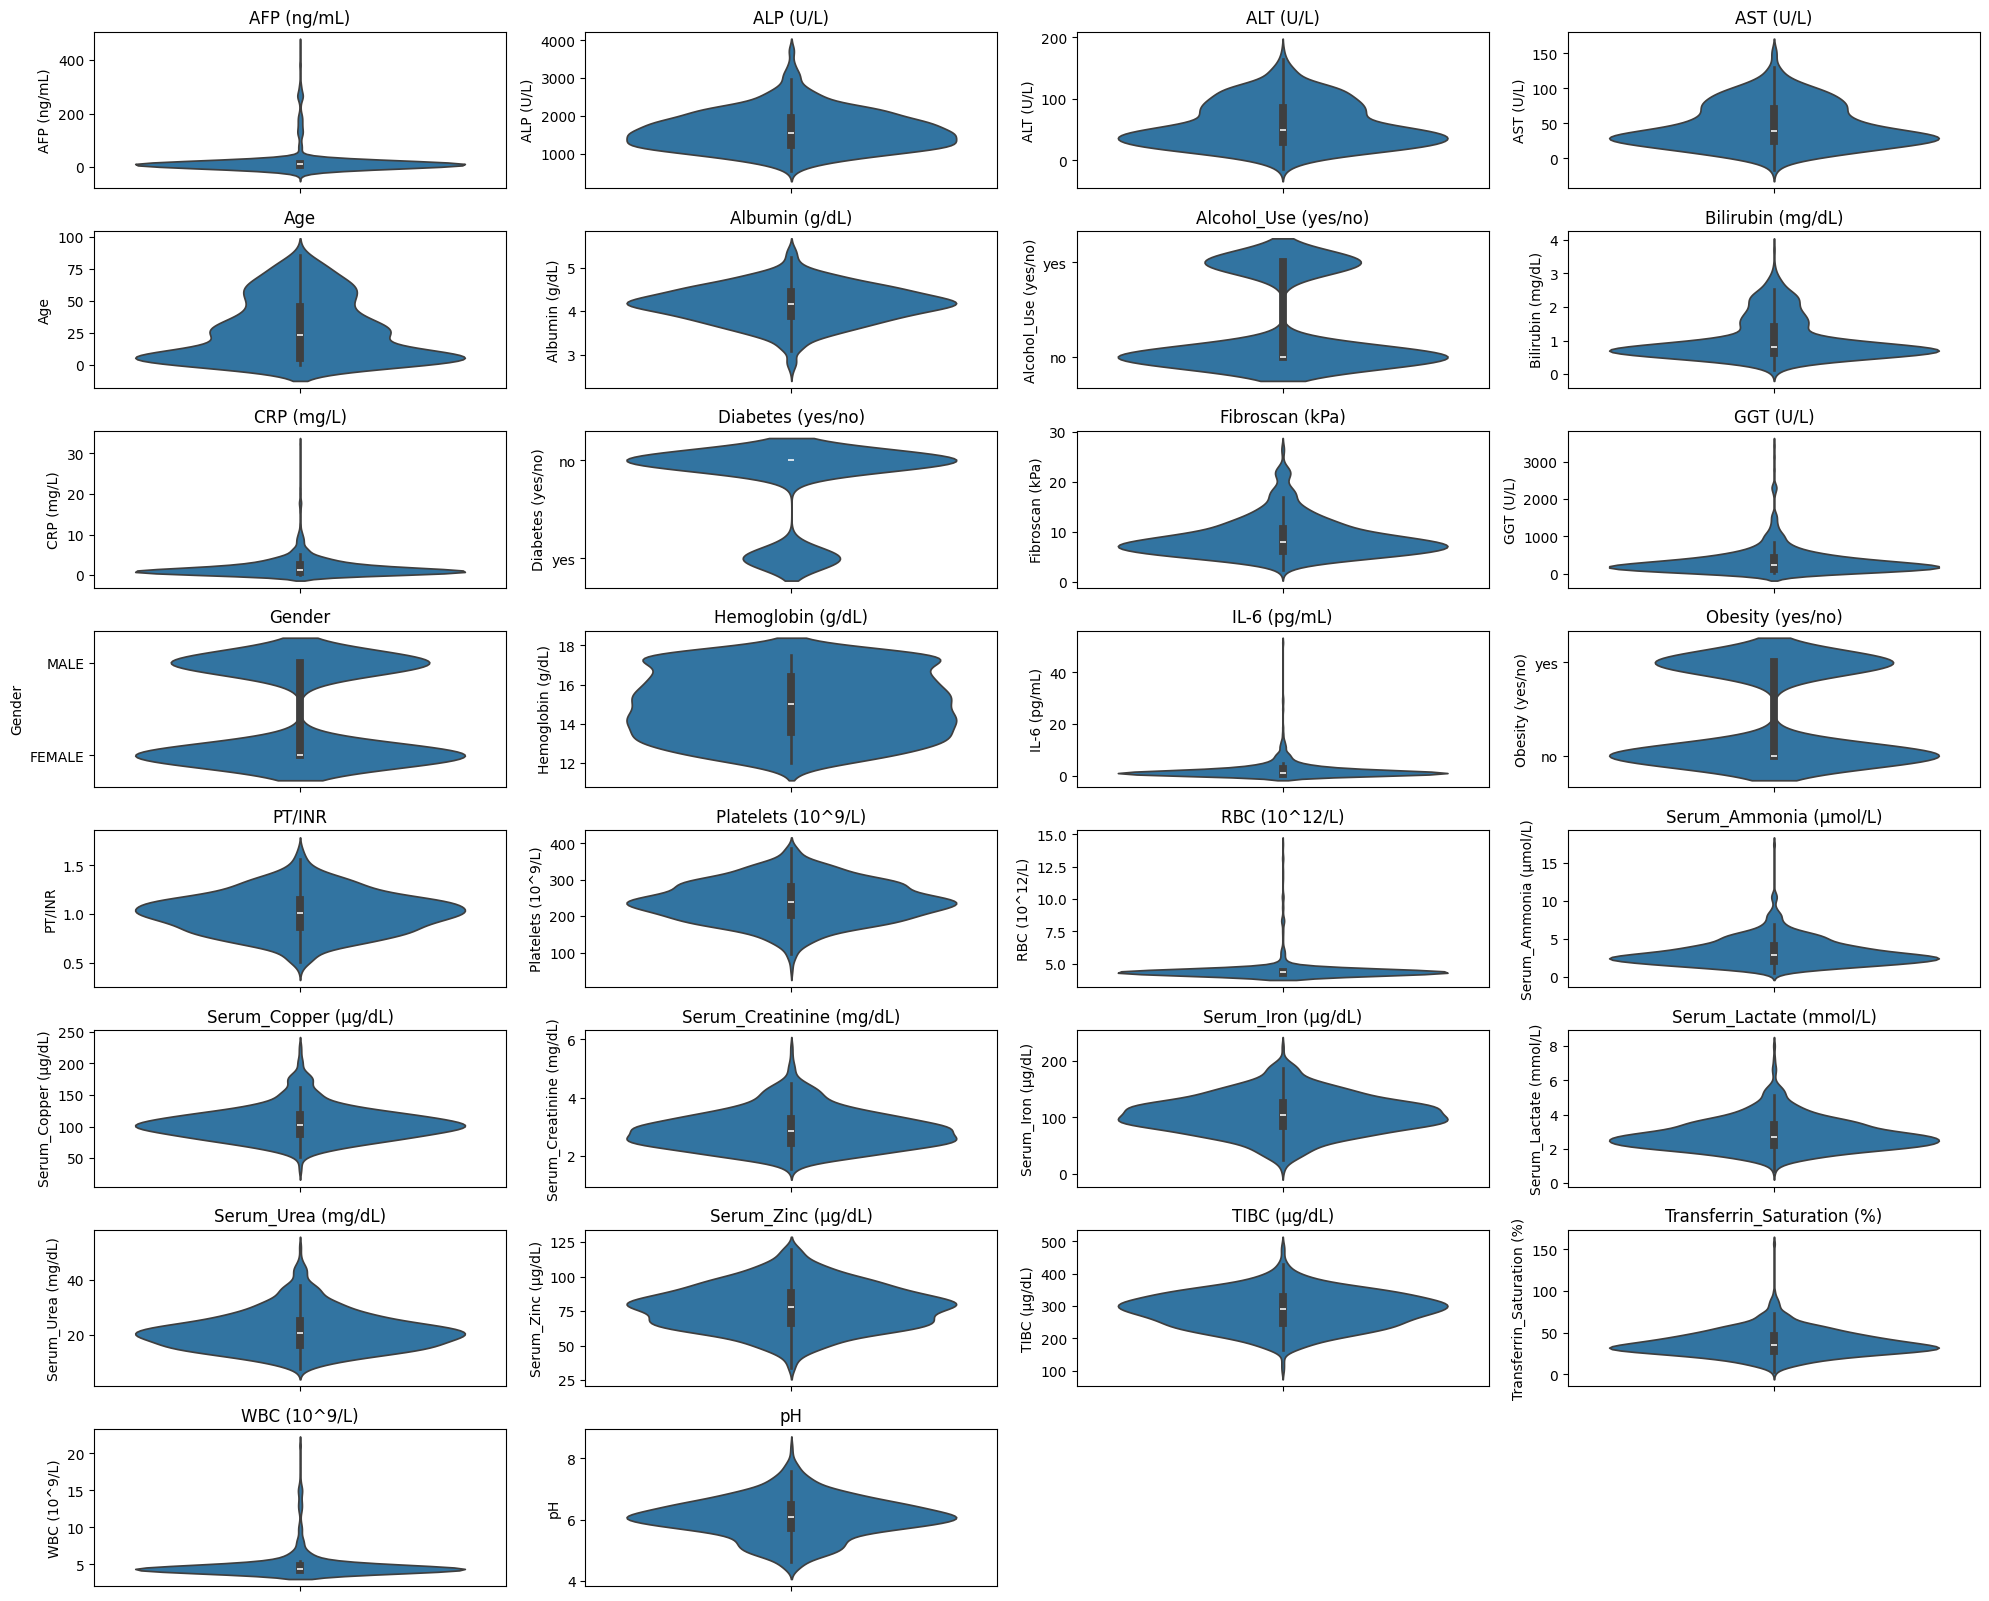

In [42]:
# Removing the target variable
# =============================
features = df_train.columns[:-1]

plt.figure(figsize=(20, 60))

for i, column in enumerate(features):
    plt.subplot(len(features), 4, i + 1)
    sns.violinplot(y=df_train[column])
    plt.title(column)

plt.tight_layout()
plt.show()

### Data cleaning

In [88]:
# Coping the dataset
# ==================
df_train_copy = df_train.copy()

In [89]:
# printing the columns of the dataset
# ====================================
df_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 703 entries, 0 to 702
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       703 non-null    int64  
 1   AFP (ng/mL)                 703 non-null    float64
 2   ALP (U/L)                   703 non-null    float64
 3   ALT (U/L)                   703 non-null    float64
 4   AST (U/L)                   703 non-null    float64
 5   Age                         703 non-null    int64  
 6   Albumin (g/dL)              703 non-null    float64
 7   Alcohol_Use (yes/no)        703 non-null    object 
 8   Bilirubin (mg/dL)           703 non-null    float64
 9   CRP (mg/L)                  703 non-null    float64
 10  Diabetes (yes/no)           703 non-null    object 
 11  Fibroscan (kPa)             703 non-null    float64
 12  GGT (U/L)                   703 non-null    float64
 13  Gender                      703 non-null

#### Handling Catagorical Features

In [90]:
# Storing item of catagorical columns
# ===================================
alcohol_Use = df_train_copy['Alcohol_Use (yes/no)'].unique()
diabetis = df_train_copy['Diabetes (yes/no)'].unique()
gender = df_train_copy['Gender'].unique()
obesity = df_train_copy['Obesity (yes/no)'].unique()
diagonosis = df_train_copy['Diagnosis'].unique()

In [91]:
# Creating dictionary from array for diagnosis
# ============================================
diagonosis_dict = dict(zip(diagonosis, range(len(diagonosis))))

In [92]:
# Encoding the class label(Diagnosis) to integers
# ==============================================
df_train_copy['Diagnosis'] = df_train_copy['Diagnosis'].map(diagonosis_dict)

In [94]:
# Converting the catagorical data to numerical data
# =================================================
df_dummies = pd.get_dummies(df_train_copy, drop_first=True)


In [99]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 703 entries, 0 to 702
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       703 non-null    int64  
 1   AFP (ng/mL)                 703 non-null    float64
 2   ALP (U/L)                   703 non-null    float64
 3   ALT (U/L)                   703 non-null    float64
 4   AST (U/L)                   703 non-null    float64
 5   Age                         703 non-null    int64  
 6   Albumin (g/dL)              703 non-null    float64
 7   Bilirubin (mg/dL)           703 non-null    float64
 8   CRP (mg/L)                  703 non-null    float64
 9   Fibroscan (kPa)             703 non-null    float64
 10  GGT (U/L)                   703 non-null    float64
 11  Hemoglobin (g/dL)           703 non-null    float64
 12  IL-6 (pg/mL)                703 non-null    float64
 13  PT/INR                      703 non-null

In [96]:
# Checking the info of the dataset
# ================================
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 703 entries, 0 to 702
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       703 non-null    int64  
 1   AFP (ng/mL)                 703 non-null    float64
 2   ALP (U/L)                   703 non-null    float64
 3   ALT (U/L)                   703 non-null    float64
 4   AST (U/L)                   703 non-null    float64
 5   Age                         703 non-null    int64  
 6   Albumin (g/dL)              703 non-null    float64
 7   Bilirubin (mg/dL)           703 non-null    float64
 8   CRP (mg/L)                  703 non-null    float64
 9   Fibroscan (kPa)             703 non-null    float64
 10  GGT (U/L)                   703 non-null    float64
 11  Hemoglobin (g/dL)           703 non-null    float64
 12  IL-6 (pg/mL)                703 non-null    float64
 13  PT/INR                      703 non-null

In [102]:
# Moving the target variable to the last column
# =============================================
df_dummies = df_dummies[[col for col in df_dummies.columns if col != 'Diagnosis'] + ['Diagnosis']]
df_dummies.head()

,index,AFP (ng/mL),ALP (U/L),ALT (U/L),AST (U/L),Age,Albumin (g/dL),Bilirubin (mg/dL),CRP (mg/L),Fibroscan (kPa),...,Serum_Zinc (μg/dL),TIBC (μg/dL),Transferrin_Saturation (%),WBC (10^9/L),pH,Alcohol_Use (yes/no)_yes,Diabetes (yes/no)_yes,Gender_MALE,Obesity (yes/no)_yes,Diagnosis
0,1124,13.571425,1653.138489,40.405592,45.598427,4,4.477126,0.541997,1.002121,5.501881,...,96.124260,315.439318,30.827639,4.180007,6.163600,True,False,True,True,0
1,1188,13.649342,1940.518305,21.336986,34.064095,55,3.190724,1.199063,0.582746,13.902151,...,50.554650,268.492437,47.896200,4.590995,5.244266,True,False,True,True,1
2,530,10.898943,1557.369920,29.665496,16.044488,30,4.506351,0.740952,1.670375,6.961641,...,82.900681,312.107620,31.408057,4.524580,5.769592,False,False,False,True,0
3,686,13.872275,1273.840525,142.418649,64.204257,0,3.665655,1.939879,1.220646,9.193268,...,72.360010,182.506010,34.577016,4.234483,5.982228,True,False,True,False,2
4,296,10.102457,1461.622515,22.437303,23.940205,59,4.005109,0.769535,0.139863,11.827885,...,63.216136,212.261519,42.384844,4.306892,4.837404,False,False,False,True,0


In [108]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 703 entries, 0 to 702
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       703 non-null    int64  
 1   AFP (ng/mL)                 703 non-null    float64
 2   ALP (U/L)                   703 non-null    float64
 3   ALT (U/L)                   703 non-null    float64
 4   AST (U/L)                   703 non-null    float64
 5   Age                         703 non-null    int64  
 6   Albumin (g/dL)              703 non-null    float64
 7   Bilirubin (mg/dL)           703 non-null    float64
 8   CRP (mg/L)                  703 non-null    float64
 9   Fibroscan (kPa)             703 non-null    float64
 10  GGT (U/L)                   703 non-null    float64
 11  Hemoglobin (g/dL)           703 non-null    float64
 12  IL-6 (pg/mL)                703 non-null    float64
 13  PT/INR                      703 non-null

#### Removing Outliers

In [123]:
# Removing the outliers from the dataset using IQR method only for numerical data
# ================================================================================
# Taking only the numerical columns 
df_numerical = df_dummies.select_dtypes(include=[np.number])
# Excluding the target variable
df_numerical = df_numerical.drop('Diagnosis', axis=1)
# Calculating the IQR
Q1 = df_numerical.quantile(0.25)
Q3 = df_numerical.quantile(0.75)
IQR = Q3 - Q1
# Removing the outliers
df_numerical_2 = df_numerical[~((df_numerical < (Q1 - 1.5 * IQR)) | (df_numerical > (Q3 + 1.5 * IQR))).any(axis=1)]
df_numerical_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 309 entries, 0 to 701
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       309 non-null    int64  
 1   AFP (ng/mL)                 309 non-null    float64
 2   ALP (U/L)                   309 non-null    float64
 3   ALT (U/L)                   309 non-null    float64
 4   AST (U/L)                   309 non-null    float64
 5   Age                         309 non-null    int64  
 6   Albumin (g/dL)              309 non-null    float64
 7   Bilirubin (mg/dL)           309 non-null    float64
 8   CRP (mg/L)                  309 non-null    float64
 9   Fibroscan (kPa)             309 non-null    float64
 10  GGT (U/L)                   309 non-null    float64
 11  Hemoglobin (g/dL)           309 non-null    float64
 12  IL-6 (pg/mL)                309 non-null    float64
 13  PT/INR                      309 non-null

##### Using IQR method almost half of the data is getting eliminated so this method doesn't seems good one.
##### In the below I tried the z-score method to clean the data

In [124]:
# Detecting the outliers using the z-score (With the help of lecture note)
# =========================================================================
for column in df_numerical.columns:
    # Calculating the Z-scores for each column
    z_scores = (df_numerical[column] - df_numerical[column].mean()) / df_numerical[column].std()
    
    # Detecting outliers using the absolute value of the Z-scores (threshold of 2)
    outliers = (np.abs(z_scores) > 2)

    print(f"Number of outliers in {column}: {outliers.sum()}")


Number of outliers in index: 0
Number of outliers in AFP (ng/mL): 36
Number of outliers in ALP (U/L): 28
Number of outliers in ALT (U/L): 21
Number of outliers in AST (U/L): 24
Number of outliers in Age: 27
Number of outliers in Albumin (g/dL): 33
Number of outliers in Bilirubin (mg/dL): 45
Number of outliers in CRP (mg/L): 25
Number of outliers in Fibroscan (kPa): 40
Number of outliers in GGT (U/L): 26
Number of outliers in Hemoglobin (g/dL): 0
Number of outliers in IL-6 (pg/mL): 21
Number of outliers in PT/INR: 32
Number of outliers in Platelets (10^9/L): 28
Number of outliers in RBC (10^12/L): 19
Number of outliers in Serum_Ammonia (μmol/L): 28
Number of outliers in Serum_Copper (μg/dL): 35
Number of outliers in Serum_Creatinine (mg/dL): 33
Number of outliers in Serum_Iron (μg/dL): 36
Number of outliers in Serum_Lactate (mmol/L): 31
Number of outliers in Serum_Urea (mg/dL): 33
Number of outliers in Serum_Zinc (μg/dL): 29
Number of outliers in TIBC (μg/dL): 27
Number of outliers in T

In [125]:
# Printing information of the dataset with numerical columns
# ==========================================================
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
Index: 703 entries, 0 to 702
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       703 non-null    int64  
 1   AFP (ng/mL)                 703 non-null    float64
 2   ALP (U/L)                   703 non-null    float64
 3   ALT (U/L)                   703 non-null    float64
 4   AST (U/L)                   703 non-null    float64
 5   Age                         703 non-null    int64  
 6   Albumin (g/dL)              703 non-null    float64
 7   Bilirubin (mg/dL)           703 non-null    float64
 8   CRP (mg/L)                  703 non-null    float64
 9   Fibroscan (kPa)             703 non-null    float64
 10  GGT (U/L)                   703 non-null    float64
 11  Hemoglobin (g/dL)           703 non-null    float64
 12  IL-6 (pg/mL)                703 non-null    float64
 13  PT/INR                      703 non-null

In [128]:
# Removing the outliers from the dataset using Z-score method only for numerical data
# ====================================================================================
for column in df_numerical.columns:
    # Calculate the z-scores for each column
    z_scores = (df_numerical[column] - df_numerical[column].mean()) / df_numerical[column].std()
    
    # Only keep rows in dataframe where the z-score is less than 2 standard deviations
    df_numerical_3 = df_numerical[np.abs(z_scores) < 2]

# Checking the information of the dataset
df_numerical_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 668 entries, 0 to 702
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       668 non-null    int64  
 1   AFP (ng/mL)                 668 non-null    float64
 2   ALP (U/L)                   668 non-null    float64
 3   ALT (U/L)                   668 non-null    float64
 4   AST (U/L)                   668 non-null    float64
 5   Age                         668 non-null    int64  
 6   Albumin (g/dL)              668 non-null    float64
 7   Bilirubin (mg/dL)           668 non-null    float64
 8   CRP (mg/L)                  668 non-null    float64
 9   Fibroscan (kPa)             668 non-null    float64
 10  GGT (U/L)                   668 non-null    float64
 11  Hemoglobin (g/dL)           668 non-null    float64
 12  IL-6 (pg/mL)                668 non-null    float64
 13  PT/INR                      668 non-null

##### This seems little bit more promising than the IQR. In the next steps both datasets with outliers and without outliers will be used.

In [138]:
# Merging the numerical columns with the catagorical columns based on the index column
# ====================================================================================
rest_columns = ['Alcohol_Use (yes/no)_yes', 'Diabetes (yes/no)_yes', 
                    'Gender_MALE', 'Obesity (yes/no)_yes', 'Diagnosis']
df_cleaned = pd.merge(df_numerical_3, df_dummies[rest_columns], left_index=True, right_index=True)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 668 entries, 0 to 702
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       668 non-null    int64  
 1   AFP (ng/mL)                 668 non-null    float64
 2   ALP (U/L)                   668 non-null    float64
 3   ALT (U/L)                   668 non-null    float64
 4   AST (U/L)                   668 non-null    float64
 5   Age                         668 non-null    int64  
 6   Albumin (g/dL)              668 non-null    float64
 7   Bilirubin (mg/dL)           668 non-null    float64
 8   CRP (mg/L)                  668 non-null    float64
 9   Fibroscan (kPa)             668 non-null    float64
 10  GGT (U/L)                   668 non-null    float64
 11  Hemoglobin (g/dL)           668 non-null    float64
 12  IL-6 (pg/mL)                668 non-null    float64
 13  PT/INR                      668 non-null

#### Visualizing after cleaning

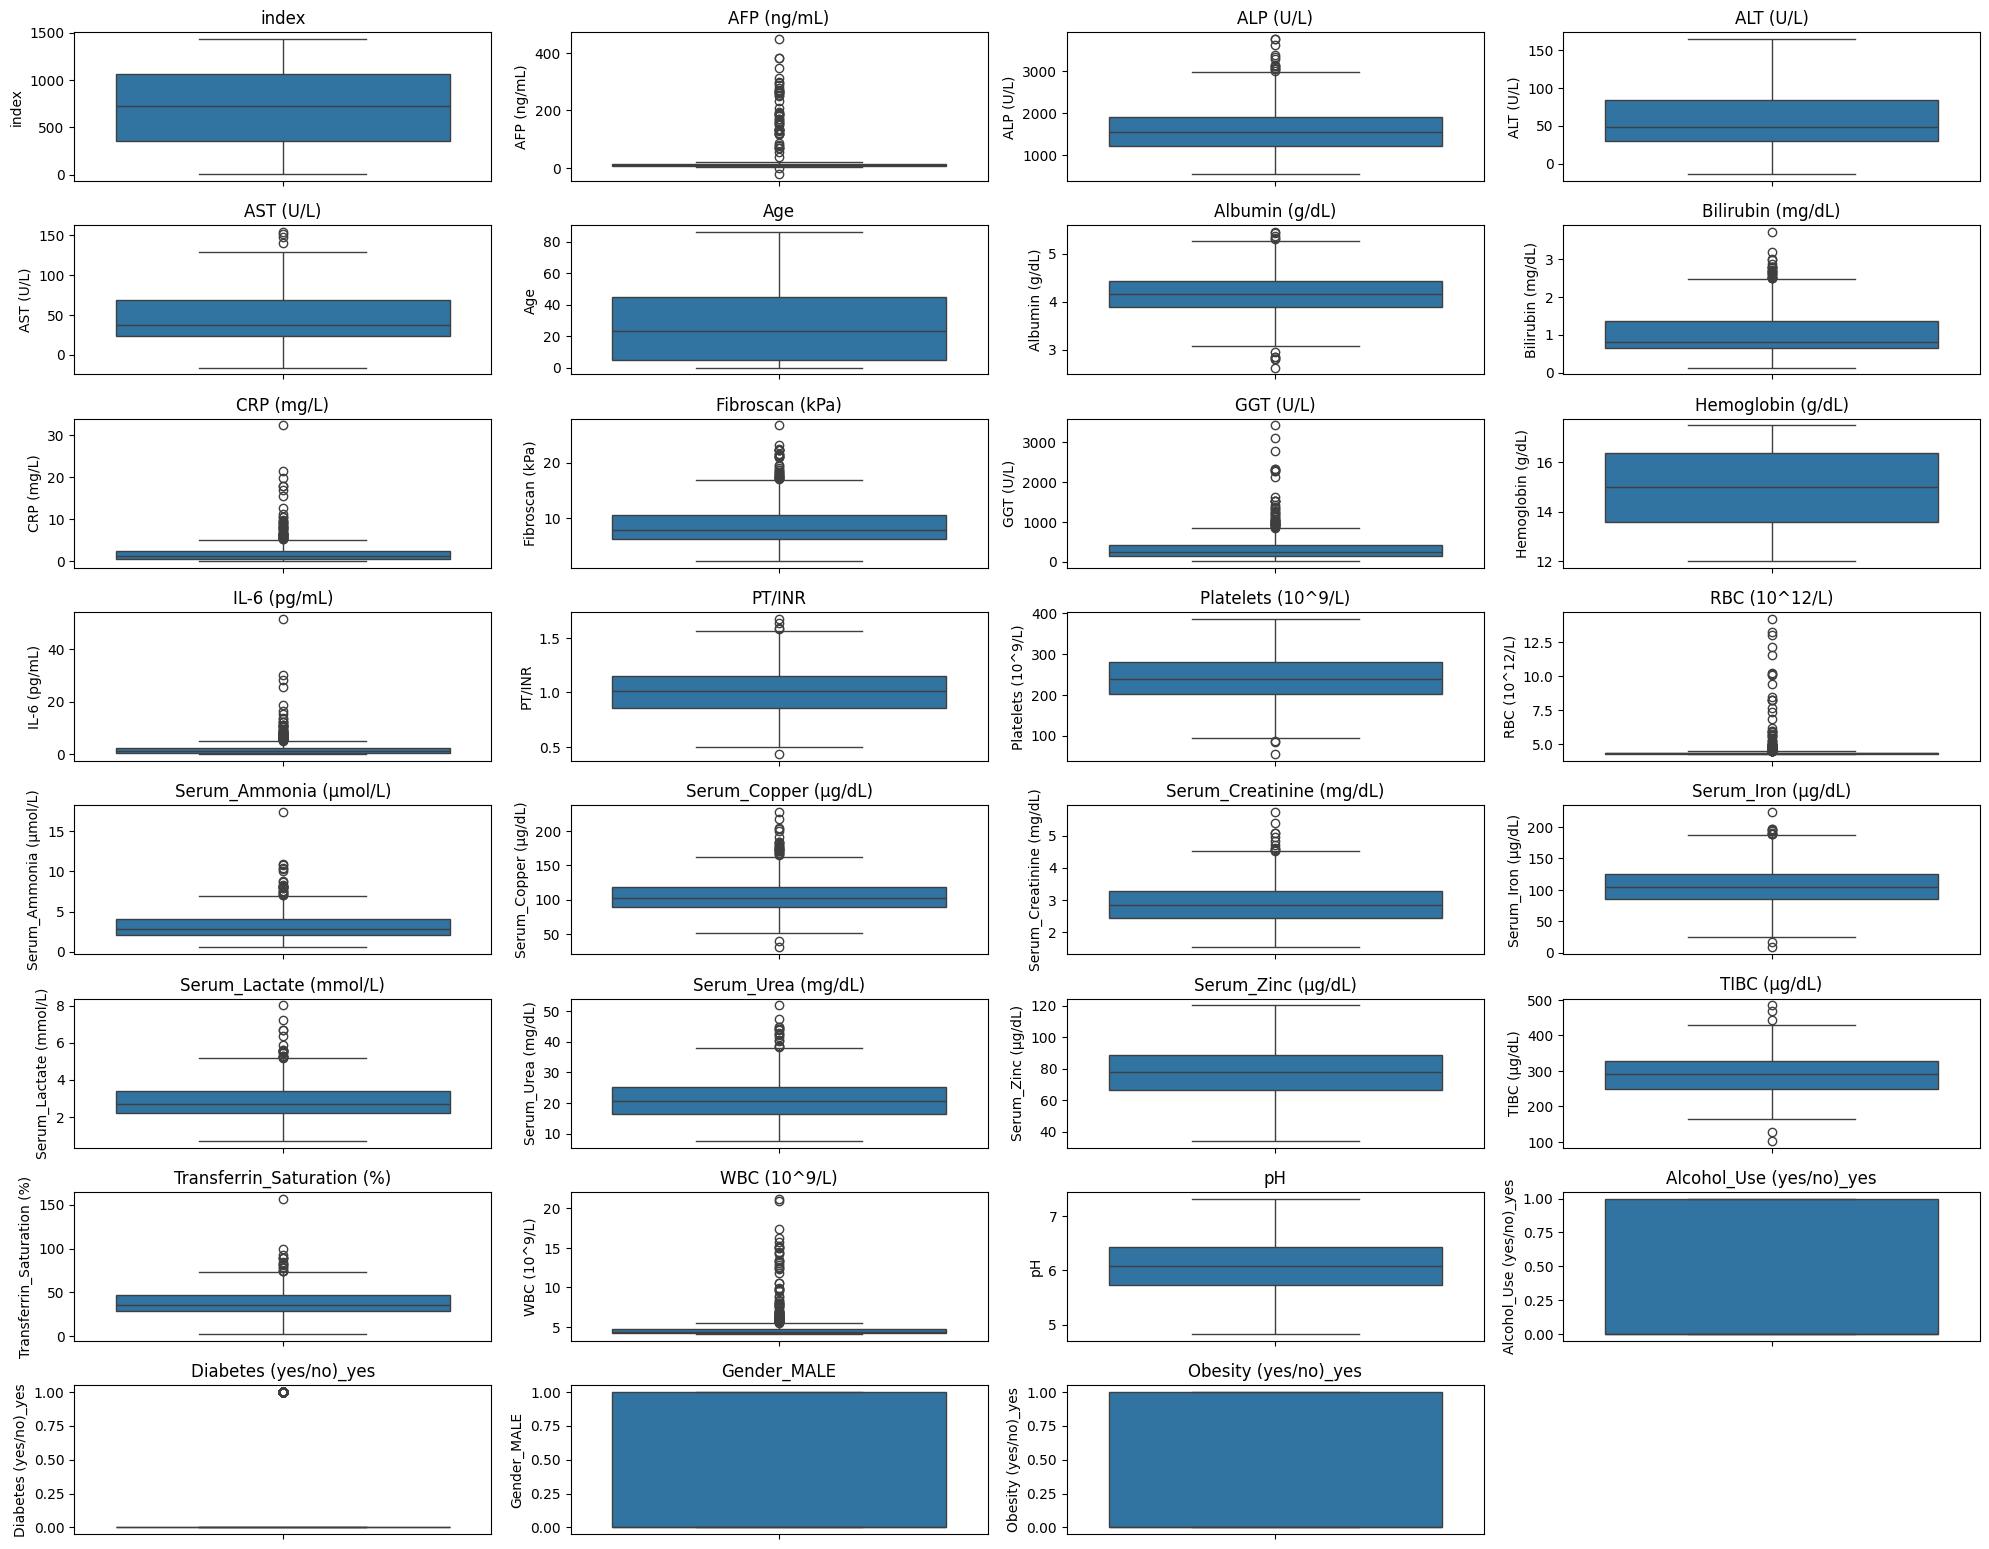

In [140]:
# Removing the target variable
# =============================
features = df_cleaned.columns[:-1]

plt.figure(figsize=(20, 60))

for i, column in enumerate(features):
    plt.subplot(len(features), 4, i + 1)
    sns.boxplot(y=df_cleaned[column])
    plt.title(column)
    plt.tight_layout()

plt.show()

##### Still shows a lot of Outliers.

### Data preprocessing and visualisation

#### Splitting the Dataset

In [147]:
#-------------------------------------------------
# Spliting the cleaned dataset into test and train
#-------------------------------------------------
X_cleaned = df_cleaned.drop('Diagnosis', axis=1)
y_cleaned = df_cleaned['Diagnosis']

X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

In [143]:
#------------------------------------------------------
# Spliting the dataset with outlier into test and train
#------------------------------------------------------
X = df_dummies.drop('Diagnosis', axis=1)
y = df_dummies['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Scaling the dataset

In [148]:
# ==========================================================================================================================
# Standardising the cleaned dataset using the StandardScaler (Taken from the lecture also this is the common way of scaling) 
# ==========================================================================================================================
# Initialise standard scaler and compute mean and stddev from training data
sc = StandardScaler()
sc.fit(X_train_cleaned)

# Transform (standardise) both X_train_imp and X_test_imp with mean and stddev from training data
X_train_cleaned_sc = sc.transform(X_train_cleaned)
X_test_cleaned_sc = sc.transform(X_test_cleaned)


In [149]:
# ============================================================================================================================
# Standardising the uncleaned dataset using the StandardScaler (Taken from the lecture also this is the common way of scaling) 
# ============================================================================================================================
# Initialise standard scaler and compute mean and stddev from training data
sc2 = StandardScaler()
sc2.fit(X_train)

# Transform (standardise) both X_train_imp and X_test_imp with mean and stddev from training data
X_train_sc = sc2.transform(X_train)
X_test_sc = sc2.transform(X_test)

#### Exploring training data after cleaning and scaling

In [150]:
# Converting numpy array to dataframe
# ====================================
X_train_cleaned_sc_df = pd.DataFrame(X_train_cleaned_sc, columns=X_train_cleaned.columns)
X_test_cleaned_sc_df = pd.DataFrame(X_test_cleaned_sc, columns=X_test_cleaned.columns)

In [152]:
X_train_cleaned_sc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       534 non-null    float64
 1   AFP (ng/mL)                 534 non-null    float64
 2   ALP (U/L)                   534 non-null    float64
 3   ALT (U/L)                   534 non-null    float64
 4   AST (U/L)                   534 non-null    float64
 5   Age                         534 non-null    float64
 6   Albumin (g/dL)              534 non-null    float64
 7   Bilirubin (mg/dL)           534 non-null    float64
 8   CRP (mg/L)                  534 non-null    float64
 9   Fibroscan (kPa)             534 non-null    float64
 10  GGT (U/L)                   534 non-null    float64
 11  Hemoglobin (g/dL)           534 non-null    float64
 12  IL-6 (pg/mL)                534 non-null    float64
 13  PT/INR                      534 non

In [153]:
X_train_cleaned_sc_df.describe()

,index,AFP (ng/mL),ALP (U/L),ALT (U/L),AST (U/L),Age,Albumin (g/dL),Bilirubin (mg/dL),CRP (mg/L),Fibroscan (kPa),...,Serum_Urea (mg/dL),Serum_Zinc (μg/dL),TIBC (μg/dL),Transferrin_Saturation (%),WBC (10^9/L),pH,Alcohol_Use (yes/no)_yes,Diabetes (yes/no)_yes,Gender_MALE,Obesity (yes/no)_yes
count,5.340000e+02,5.340000e+02,5.340000e+02,5.340000e+02,5.340000e+02,5.340000e+02,5.340000e+02,5.340000e+02,5.340000e+02,5.340000e+02,...,5.340000e+02,5.340000e+02,5.340000e+02,5.340000e+02,5.340000e+02,5.340000e+02,5.340000e+02,5.340000e+02,5.340000e+02,5.340000e+02
mean,-1.180911e-16,-6.154045e-17,-1.180911e-16,1.713153e-16,-2.195497e-16,5.987720e-17,-7.567812e-16,9.314231e-17,5.156092e-17,-3.925283e-16,...,-4.324464e-16,5.854659e-16,6.087515e-16,4.989766e-18,-3.659162e-17,-7.451384e-16,-8.981580e-17,1.995907e-17,6.819347e-17,-5.821394e-17
std,1.000938e+00,1.000938e+00,1.000938e+00,1.000938e+00,1.000938e+00,1.000938e+00,1.000938e+00,1.000938e+00,1.000938e+00,1.000938e+00,...,1.000938e+00,1.000938e+00,1.000938e+00,1.000938e+00,1.000938e+00,1.000938e+00,1.000938e+00,1.000938e+00,1.000938e+00,1.000938e+00
min,-1.763994e+00,-8.256562e-01,-2.131758e+00,-1.938801e+00,-2.040005e+00,-1.156348e+00,-3.559773e+00,-1.499845e+00,-7.190447e-01,-1.615041e+00,...,-1.883200e+00,-2.771356e+00,-3.393543e+00,-2.292524e+00,-4.293746e-01,-2.166626e+00,-6.952218e-01,-5.528322e-01,-9.000942e-01,-8.019208e-01
25%,-8.497209e-01,-2.975037e-01,-7.773894e-01,-7.727706e-01,-6.965279e-01,-8.990428e-01,-6.508088e-01,-6.747344e-01,-5.124210e-01,-7.042043e-01,...,-7.078628e-01,-7.497624e-01,-7.216036e-01,-6.254480e-01,-3.755722e-01,-5.823064e-01,-6.952218e-01,-5.528322e-01,-9.000942e-01,-8.019208e-01
50%,5.232960e-02,-2.581759e-01,-1.037174e-01,-2.641026e-01,-2.718551e-01,-1.700110e-01,3.100338e-02,-3.935366e-01,-2.924946e-01,-2.421418e-01,...,-1.099564e-01,-2.224405e-02,2.934278e-02,-1.667108e-01,-3.319719e-01,5.553794e-02,-6.952218e-01,-5.528322e-01,-9.000942e-01,-8.019208e-01
75%,8.376513e-01,-2.139493e-01,6.230544e-01,6.873602e-01,5.991761e-01,7.734418e-01,6.488370e-01,4.308037e-01,1.478699e-01,4.670418e-01,...,5.130497e-01,6.610272e-01,6.948991e-01,5.590337e-01,-1.238690e-01,6.667401e-01,1.438390e+00,-5.528322e-01,1.110995e+00,1.247006e+00
max,1.734201e+00,7.280106e+00,4.284624e+00,2.897595e+00,3.571006e+00,2.445926e+00,2.995433e+00,4.407403e+00,1.105432e+01,4.632508e+00,...,4.351504e+00,2.620902e+00,3.544028e+00,7.525671e+00,7.680555e+00,2.270744e+00,1.438390e+00,1.808867e+00,1.110995e+00,1.247006e+00


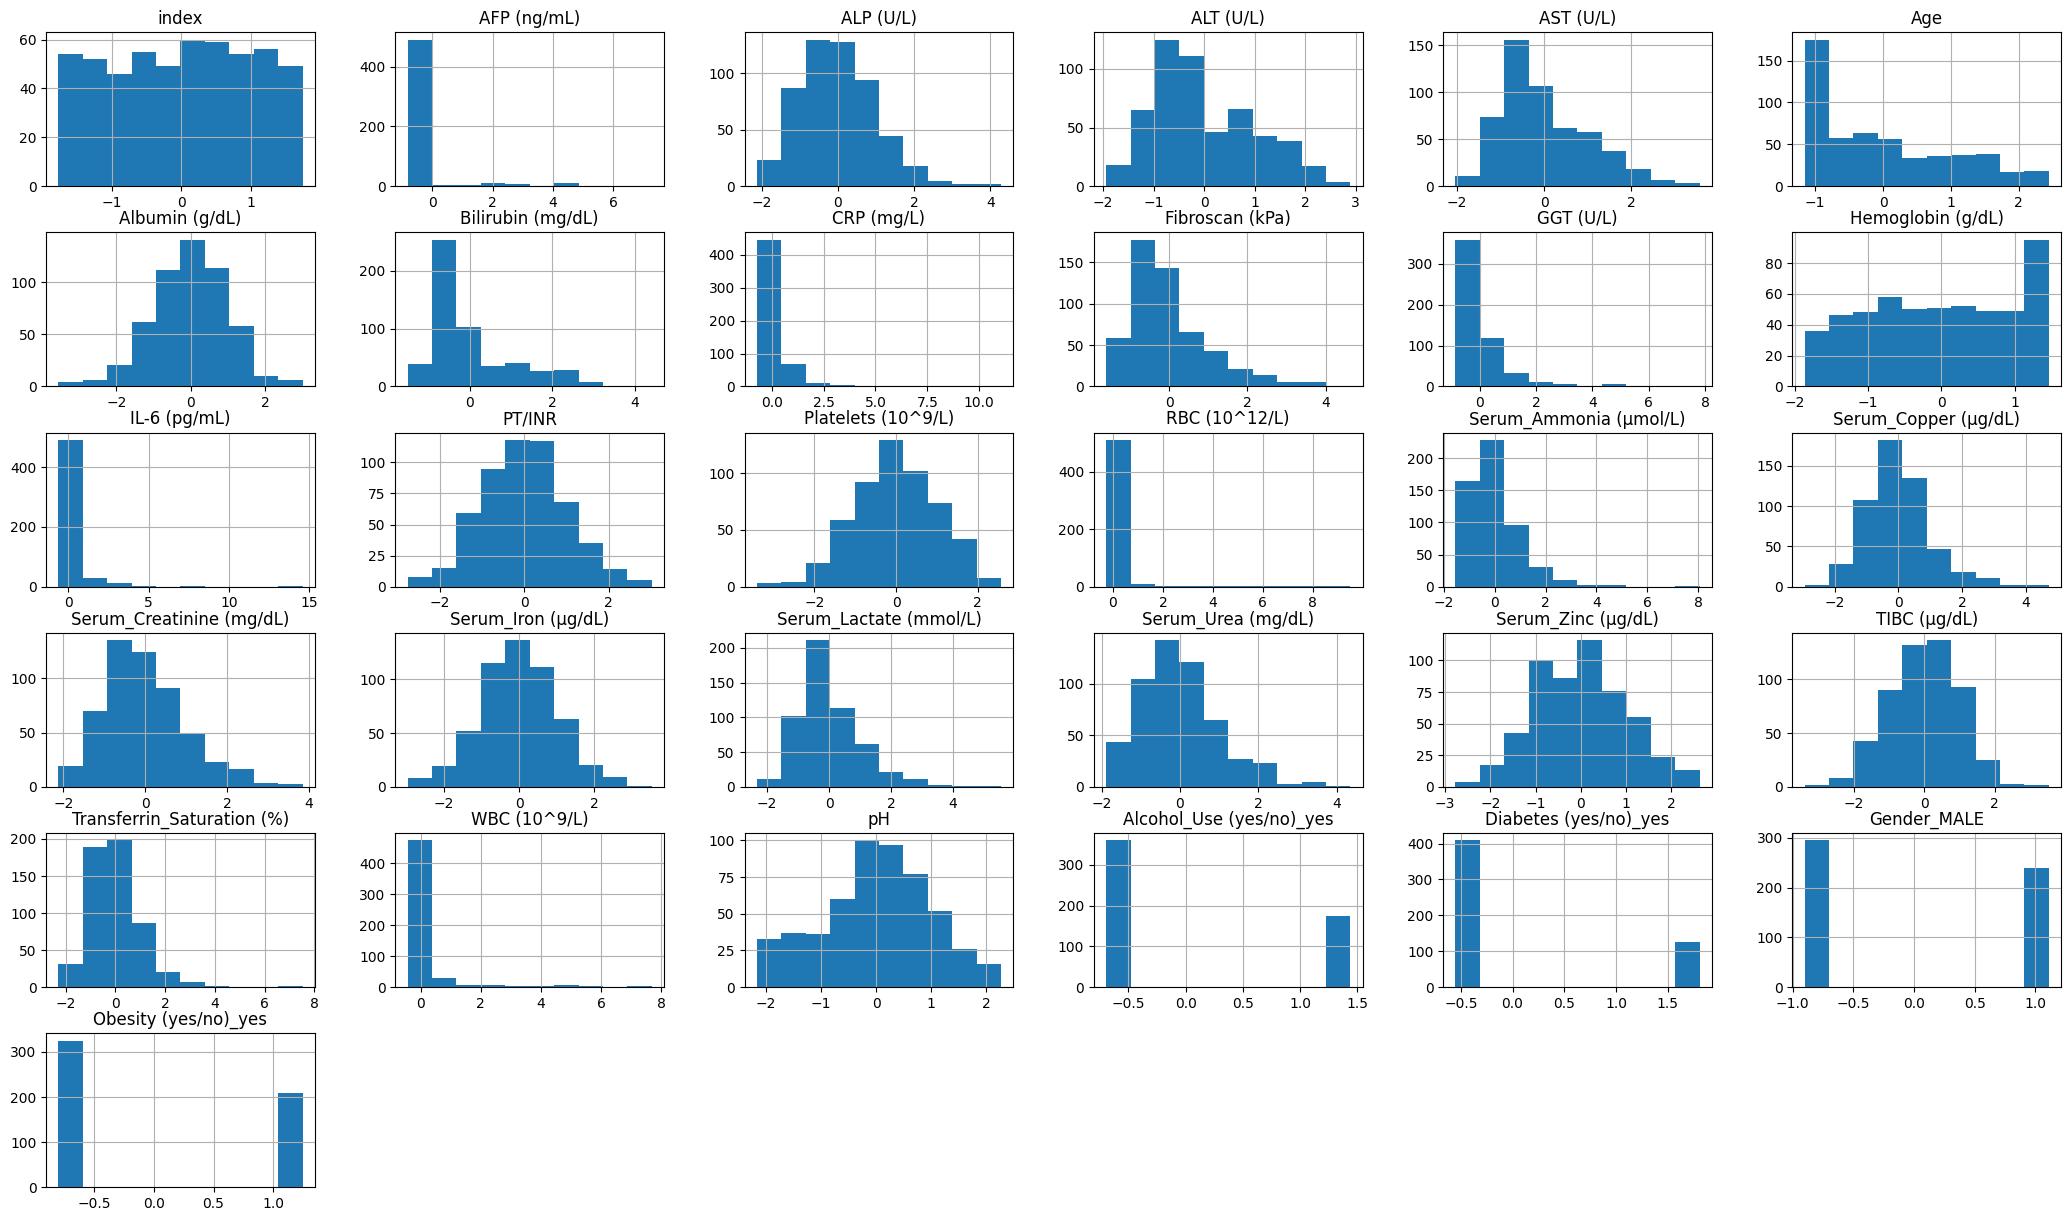

In [161]:
# Plotting histograms for all columns in the dataset
# ==================================================
X_train_cleaned_sc_df.hist(bins=10, figsize=(26, 15))
plt.show()

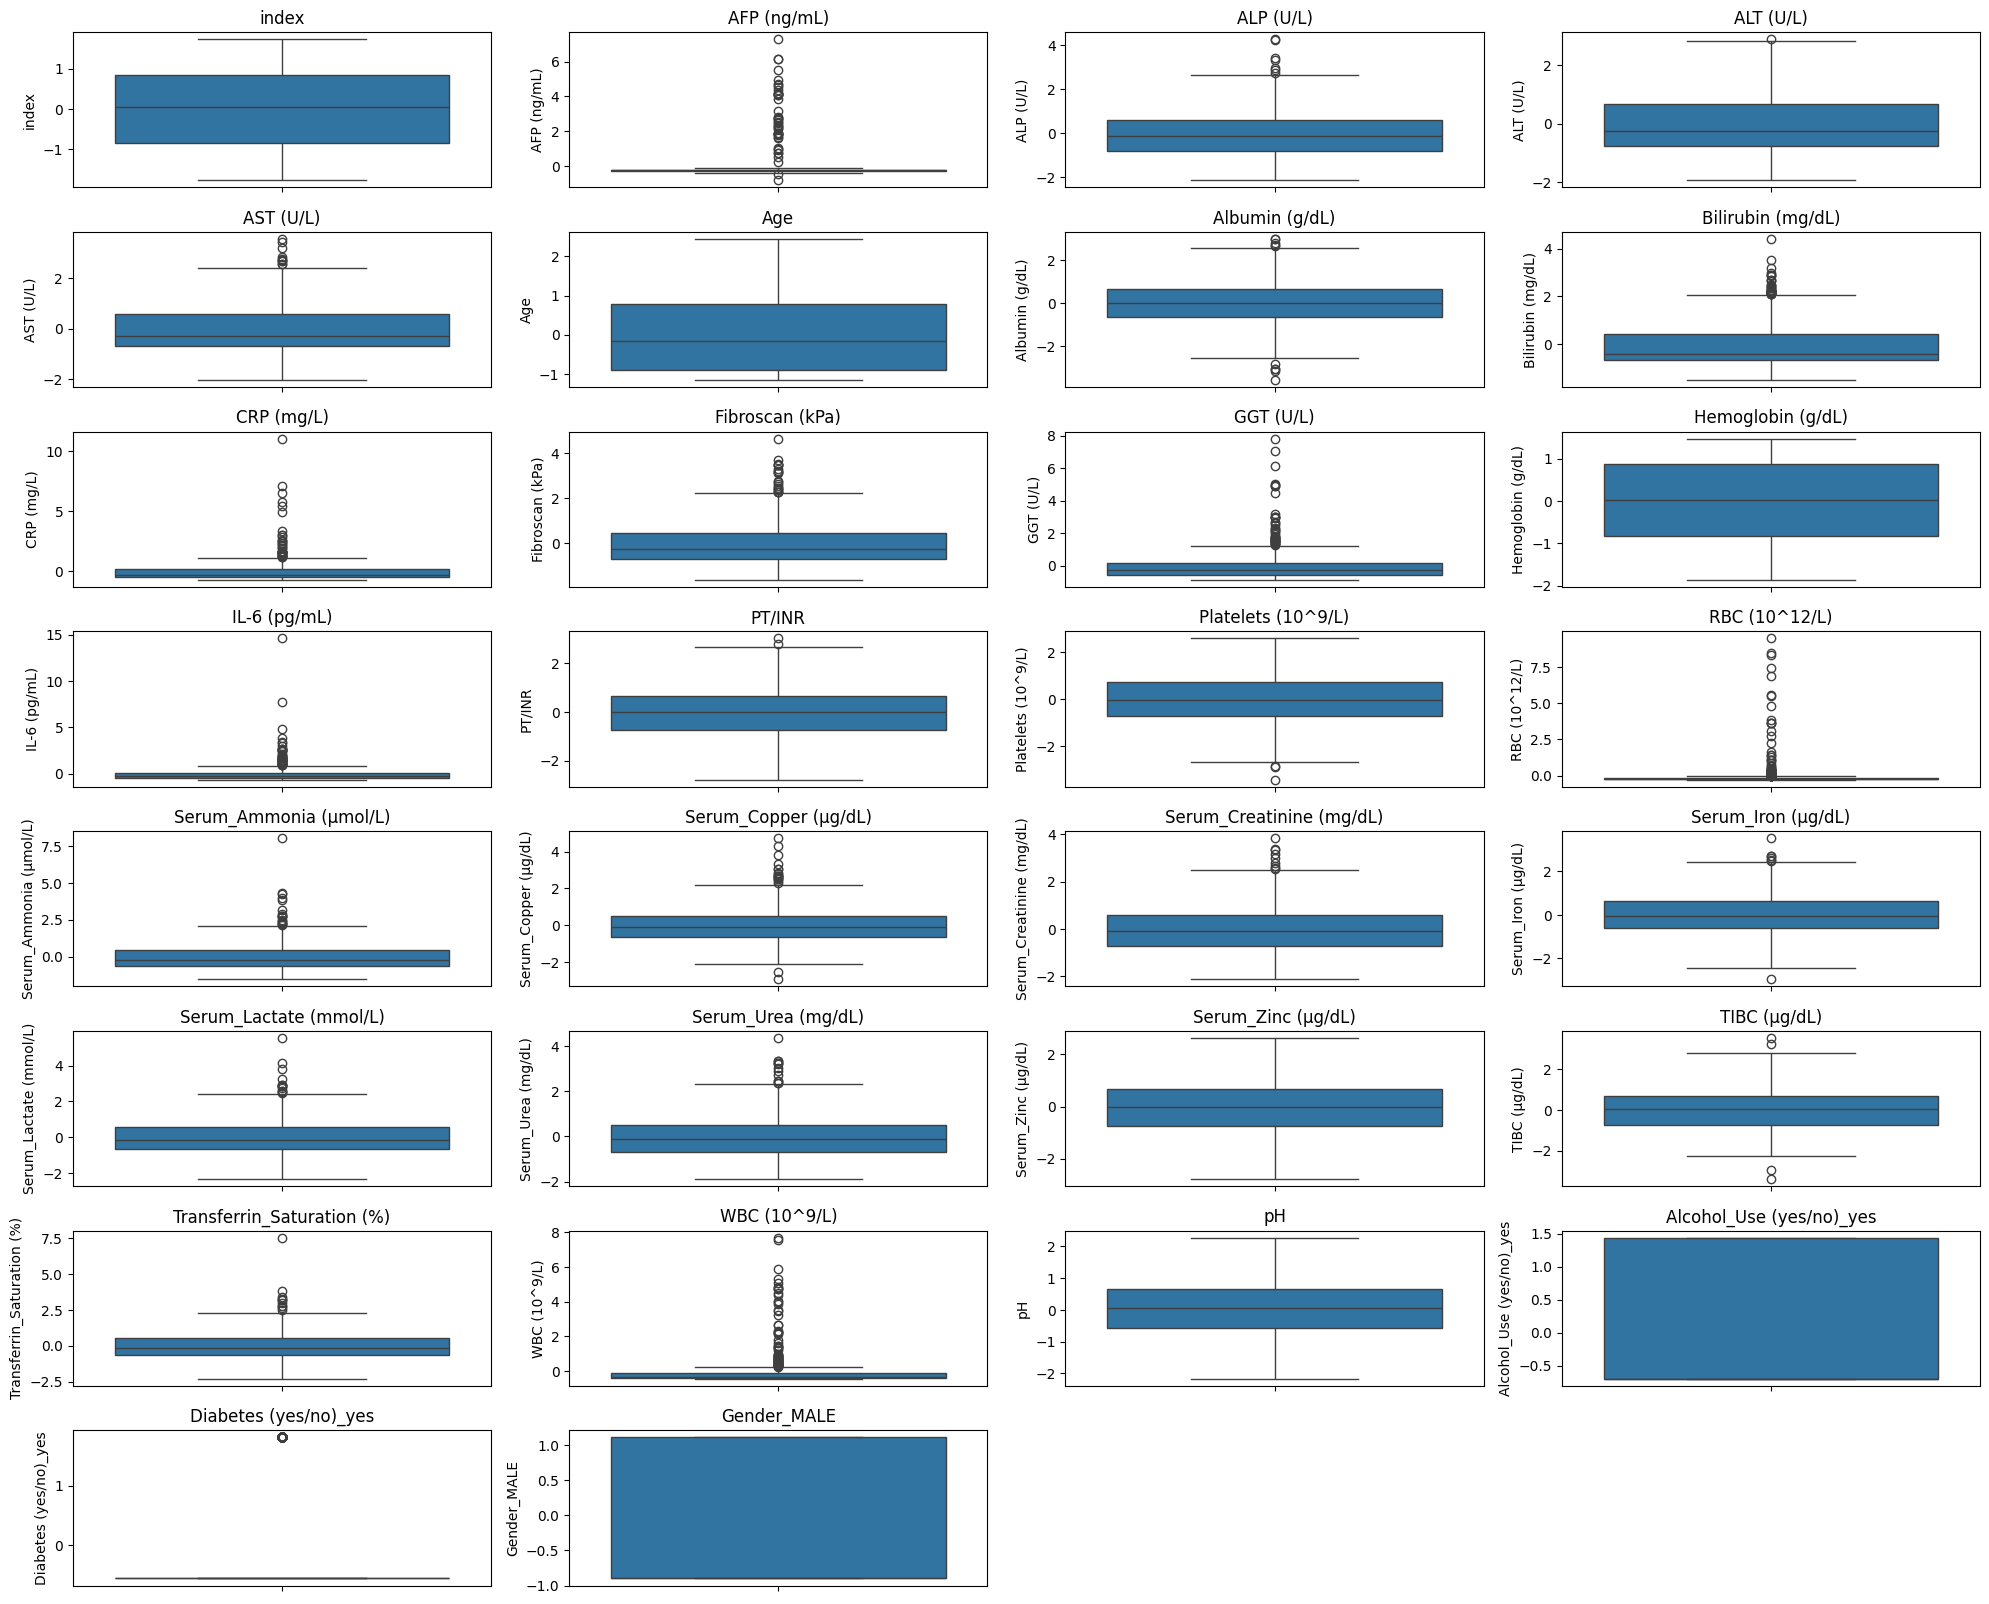

In [ ]:
# Plotting the Boxplot for the cleaned dataset i.e X_train_cleaned_sc_df
# ======================================================================
features = X_train_cleaned_sc_df.columns[:-1]

plt.figure(figsize=(20, 60))

for i, column in enumerate(features):
    plt.subplot(len(features), 4, i + 1)
    sns.boxplot(y=X_train_cleaned_sc_df[column])
    plt.title(column)
    plt.tight_layout()

plt.show()

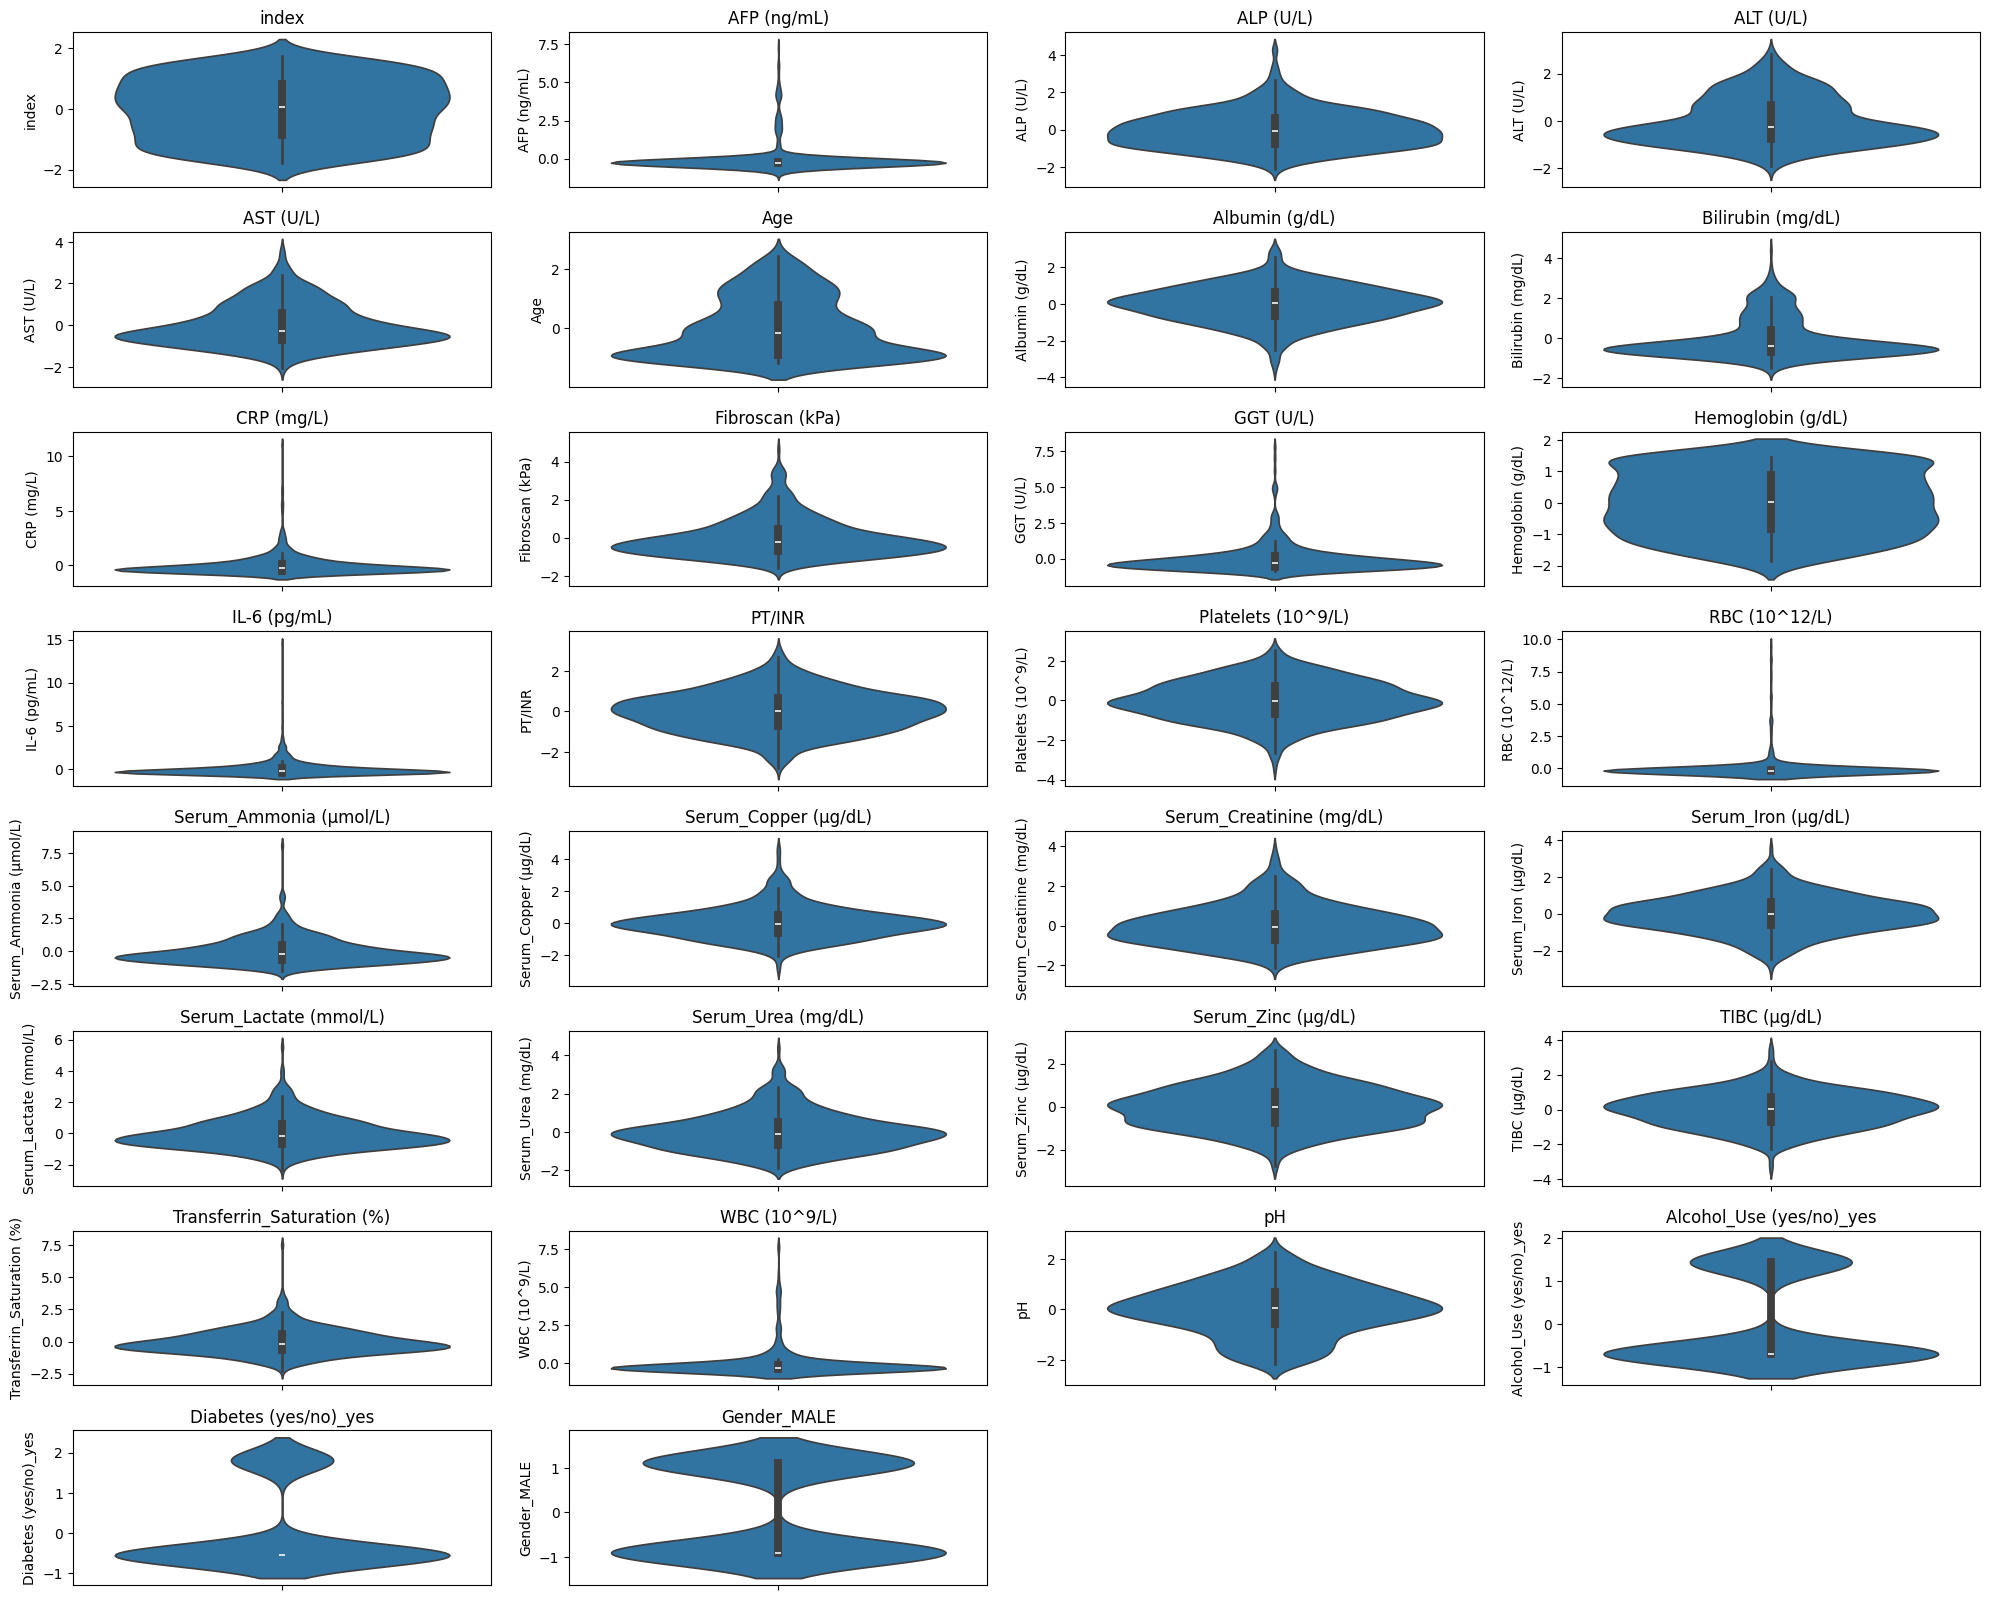

In [166]:
# Plotting the Violin plot for the cleaned dataset i.e X_train_cleaned_sc_df
# ==========================================================================
features = X_train_cleaned_sc_df.columns[:-1]

plt.figure(figsize=(20, 60))

for i, column in enumerate(features):
    plt.subplot(len(features), 4, i + 1)
    sns.violinplot(y=X_train_cleaned_sc_df[column])
    plt.title(column)

plt.tight_layout()
plt.show()


In [155]:
# Converting numpy array to dataframe
# ====================================
X_train_sc_df = pd.DataFrame(X_train_sc, columns=X_train.columns)
X_test_sc_df = pd.DataFrame(X_test_sc, columns=X_test.columns)

In [157]:
X_train_sc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562 entries, 0 to 561
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       562 non-null    float64
 1   AFP (ng/mL)                 562 non-null    float64
 2   ALP (U/L)                   562 non-null    float64
 3   ALT (U/L)                   562 non-null    float64
 4   AST (U/L)                   562 non-null    float64
 5   Age                         562 non-null    float64
 6   Albumin (g/dL)              562 non-null    float64
 7   Bilirubin (mg/dL)           562 non-null    float64
 8   CRP (mg/L)                  562 non-null    float64
 9   Fibroscan (kPa)             562 non-null    float64
 10  GGT (U/L)                   562 non-null    float64
 11  Hemoglobin (g/dL)           562 non-null    float64
 12  IL-6 (pg/mL)                562 non-null    float64
 13  PT/INR                      562 non

In [158]:
X_train_sc_df.describe()

,index,AFP (ng/mL),ALP (U/L),ALT (U/L),AST (U/L),Age,Albumin (g/dL),Bilirubin (mg/dL),CRP (mg/L),Fibroscan (kPa),...,Serum_Urea (mg/dL),Serum_Zinc (μg/dL),TIBC (μg/dL),Transferrin_Saturation (%),WBC (10^9/L),pH,Alcohol_Use (yes/no)_yes,Diabetes (yes/no)_yes,Gender_MALE,Obesity (yes/no)_yes
count,5.620000e+02,5.620000e+02,5.620000e+02,5.620000e+02,5.620000e+02,5.620000e+02,5.620000e+02,5.620000e+02,5.620000e+02,5.620000e+02,...,5.620000e+02,5.620000e+02,5.620000e+02,5.620000e+02,5.620000e+02,5.620000e+02,5.620000e+02,5.620000e+02,5.620000e+02,5.620000e+02
mean,-1.043057e-16,3.792933e-17,-4.140618e-16,2.797288e-16,-9.482332e-17,-1.264311e-17,4.361873e-16,-2.749876e-16,5.531360e-17,-1.548781e-16,...,3.824541e-16,3.366228e-16,5.025636e-16,-3.634894e-17,-1.390742e-16,2.433799e-16,-2.449602e-17,3.634894e-17,-1.074664e-16,-4.741166e-17
std,1.000891e+00,1.000891e+00,1.000891e+00,1.000891e+00,1.000891e+00,1.000891e+00,1.000891e+00,1.000891e+00,1.000891e+00,1.000891e+00,...,1.000891e+00,1.000891e+00,1.000891e+00,1.000891e+00,1.000891e+00,1.000891e+00,1.000891e+00,1.000891e+00,1.000891e+00,1.000891e+00
min,-1.718867e+00,-4.488460e-01,-2.115061e+00,-2.001630e+00,-2.049472e+00,-1.151532e+00,-3.521997e+00,-1.485677e+00,-7.267349e-01,-1.709482e+00,...,-1.892118e+00,-2.819064e+00,-3.418251e+00,-2.267119e+00,-4.429780e-01,-2.505358e+00,-6.892500e-01,-5.513115e-01,-8.951436e-01,-8.323287e-01
25%,-8.931531e-01,-2.731191e-01,-7.761582e-01,-7.953105e-01,-7.404731e-01,-9.304061e-01,-6.381563e-01,-6.844453e-01,-5.201149e-01,-6.684964e-01,...,-7.231048e-01,-7.464826e-01,-7.507189e-01,-6.373031e-01,-3.830382e-01,-5.370050e-01,-6.892500e-01,-5.513115e-01,-8.951436e-01,-8.323287e-01
50%,3.784087e-02,-2.286785e-01,-1.102511e-01,-2.664258e-01,-2.730772e-01,-1.827911e-01,2.642976e-02,-4.107520e-01,-3.023448e-01,-2.410987e-01,...,-1.371952e-01,-2.269611e-02,2.976996e-02,-1.625657e-01,-3.399475e-01,1.650718e-02,-6.892500e-01,-5.513115e-01,-8.951436e-01,-8.323287e-01
75%,8.574338e-01,-1.846490e-01,6.181689e-01,7.437377e-01,7.372387e-01,7.438302e-01,6.329819e-01,6.049656e-01,1.340079e-01,4.145121e-01,...,5.376004e-01,6.714159e-01,6.964144e-01,4.991018e-01,-1.199875e-01,6.410499e-01,1.450852e+00,-5.513115e-01,1.117139e+00,1.201448e+00
max,1.784755e+00,8.272226e+00,4.204989e+00,3.238039e+00,3.435738e+00,2.470715e+00,2.976984e+00,4.251558e+00,1.061057e+01,4.724852e+00,...,4.433176e+00,2.627985e+00,3.570145e+00,7.616851e+00,8.698573e+00,3.470433e+00,1.450852e+00,1.813857e+00,1.117139e+00,1.201448e+00


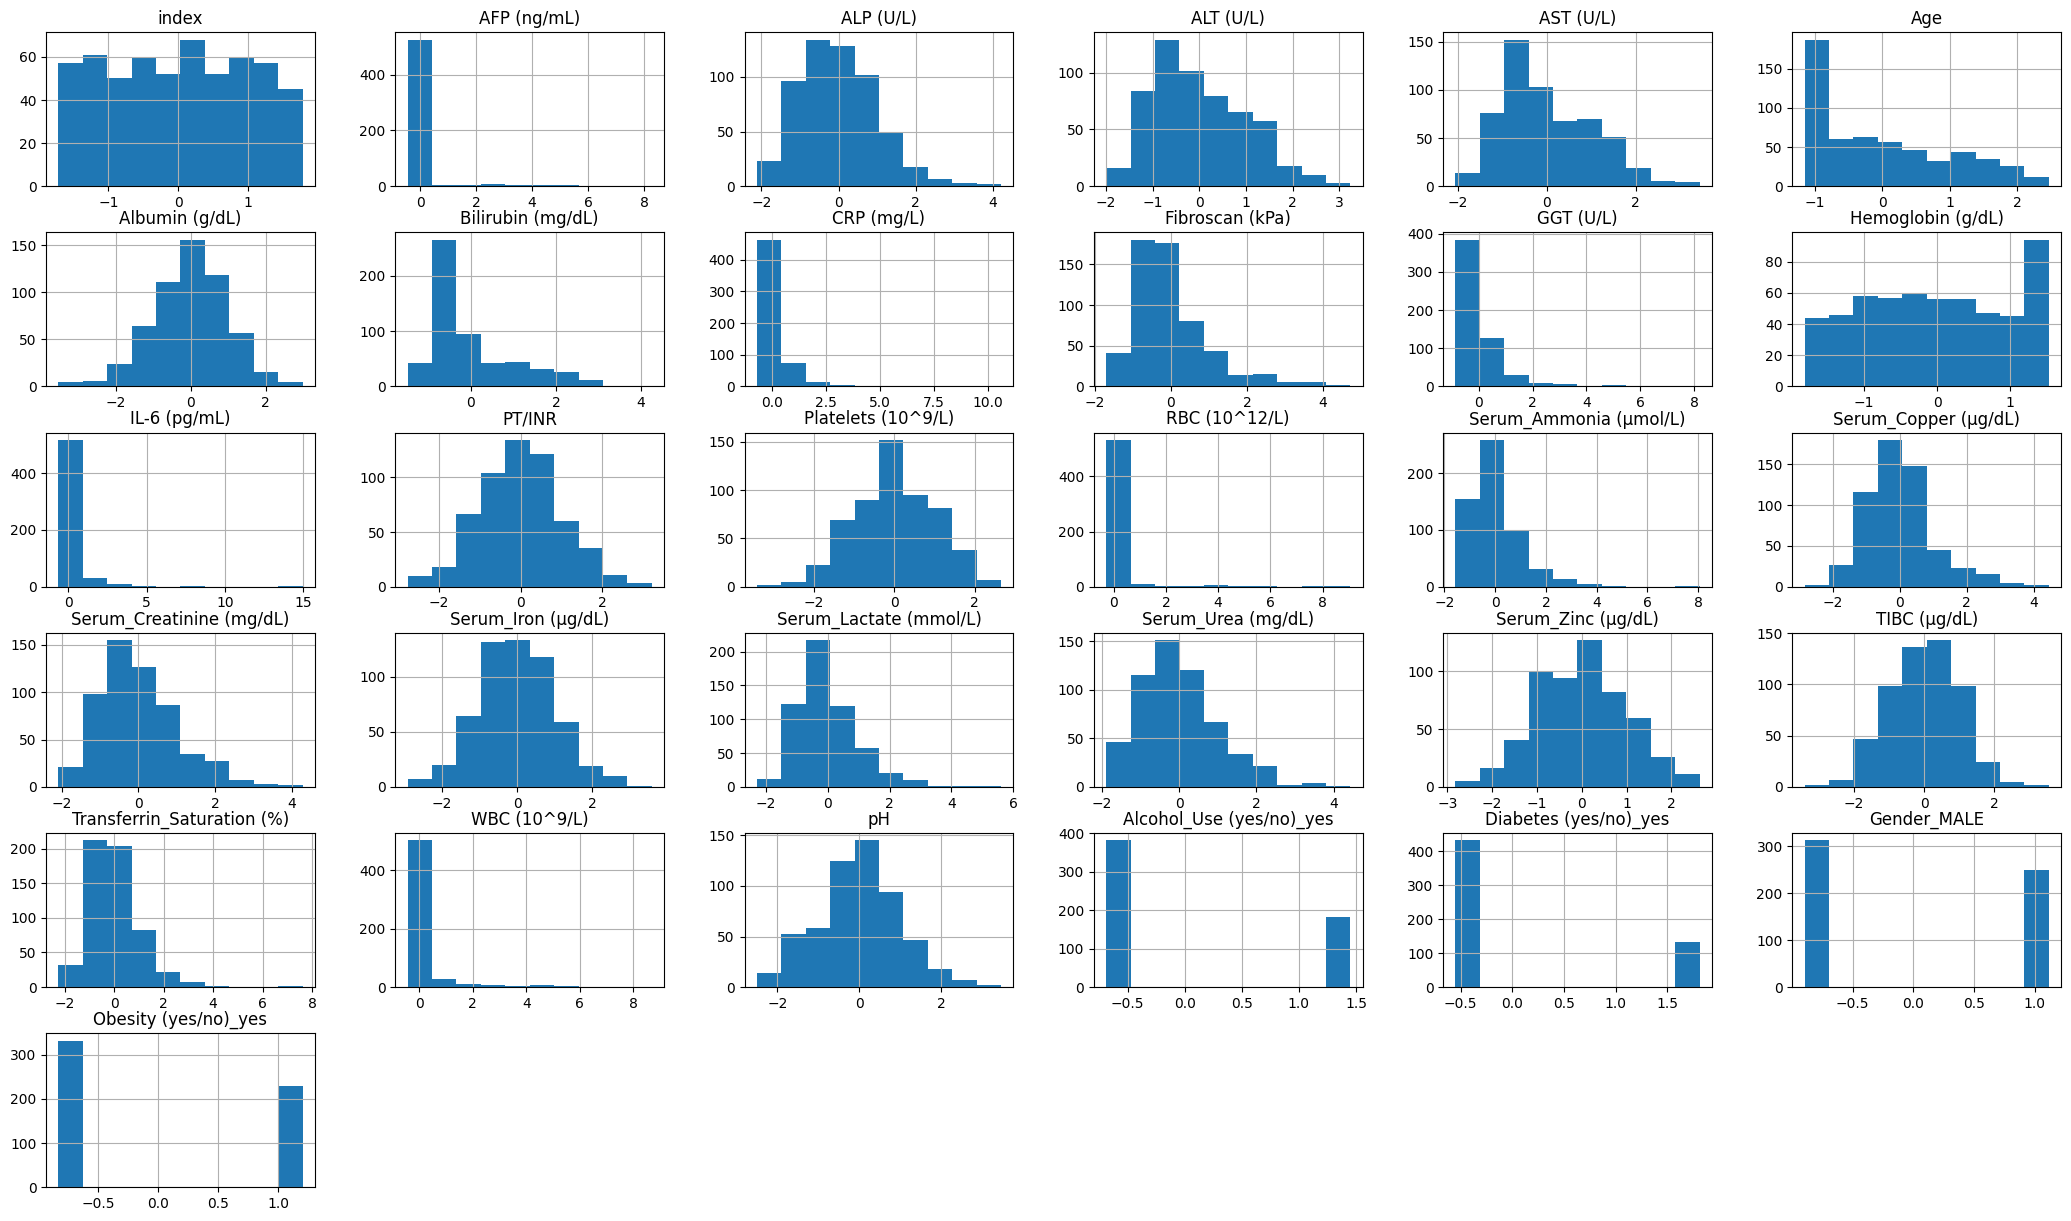

In [162]:
# Plotting histograms for all columns in the dataset
# ==================================================
X_train_sc_df.hist(bins=10, figsize=(26, 15))
plt.show()

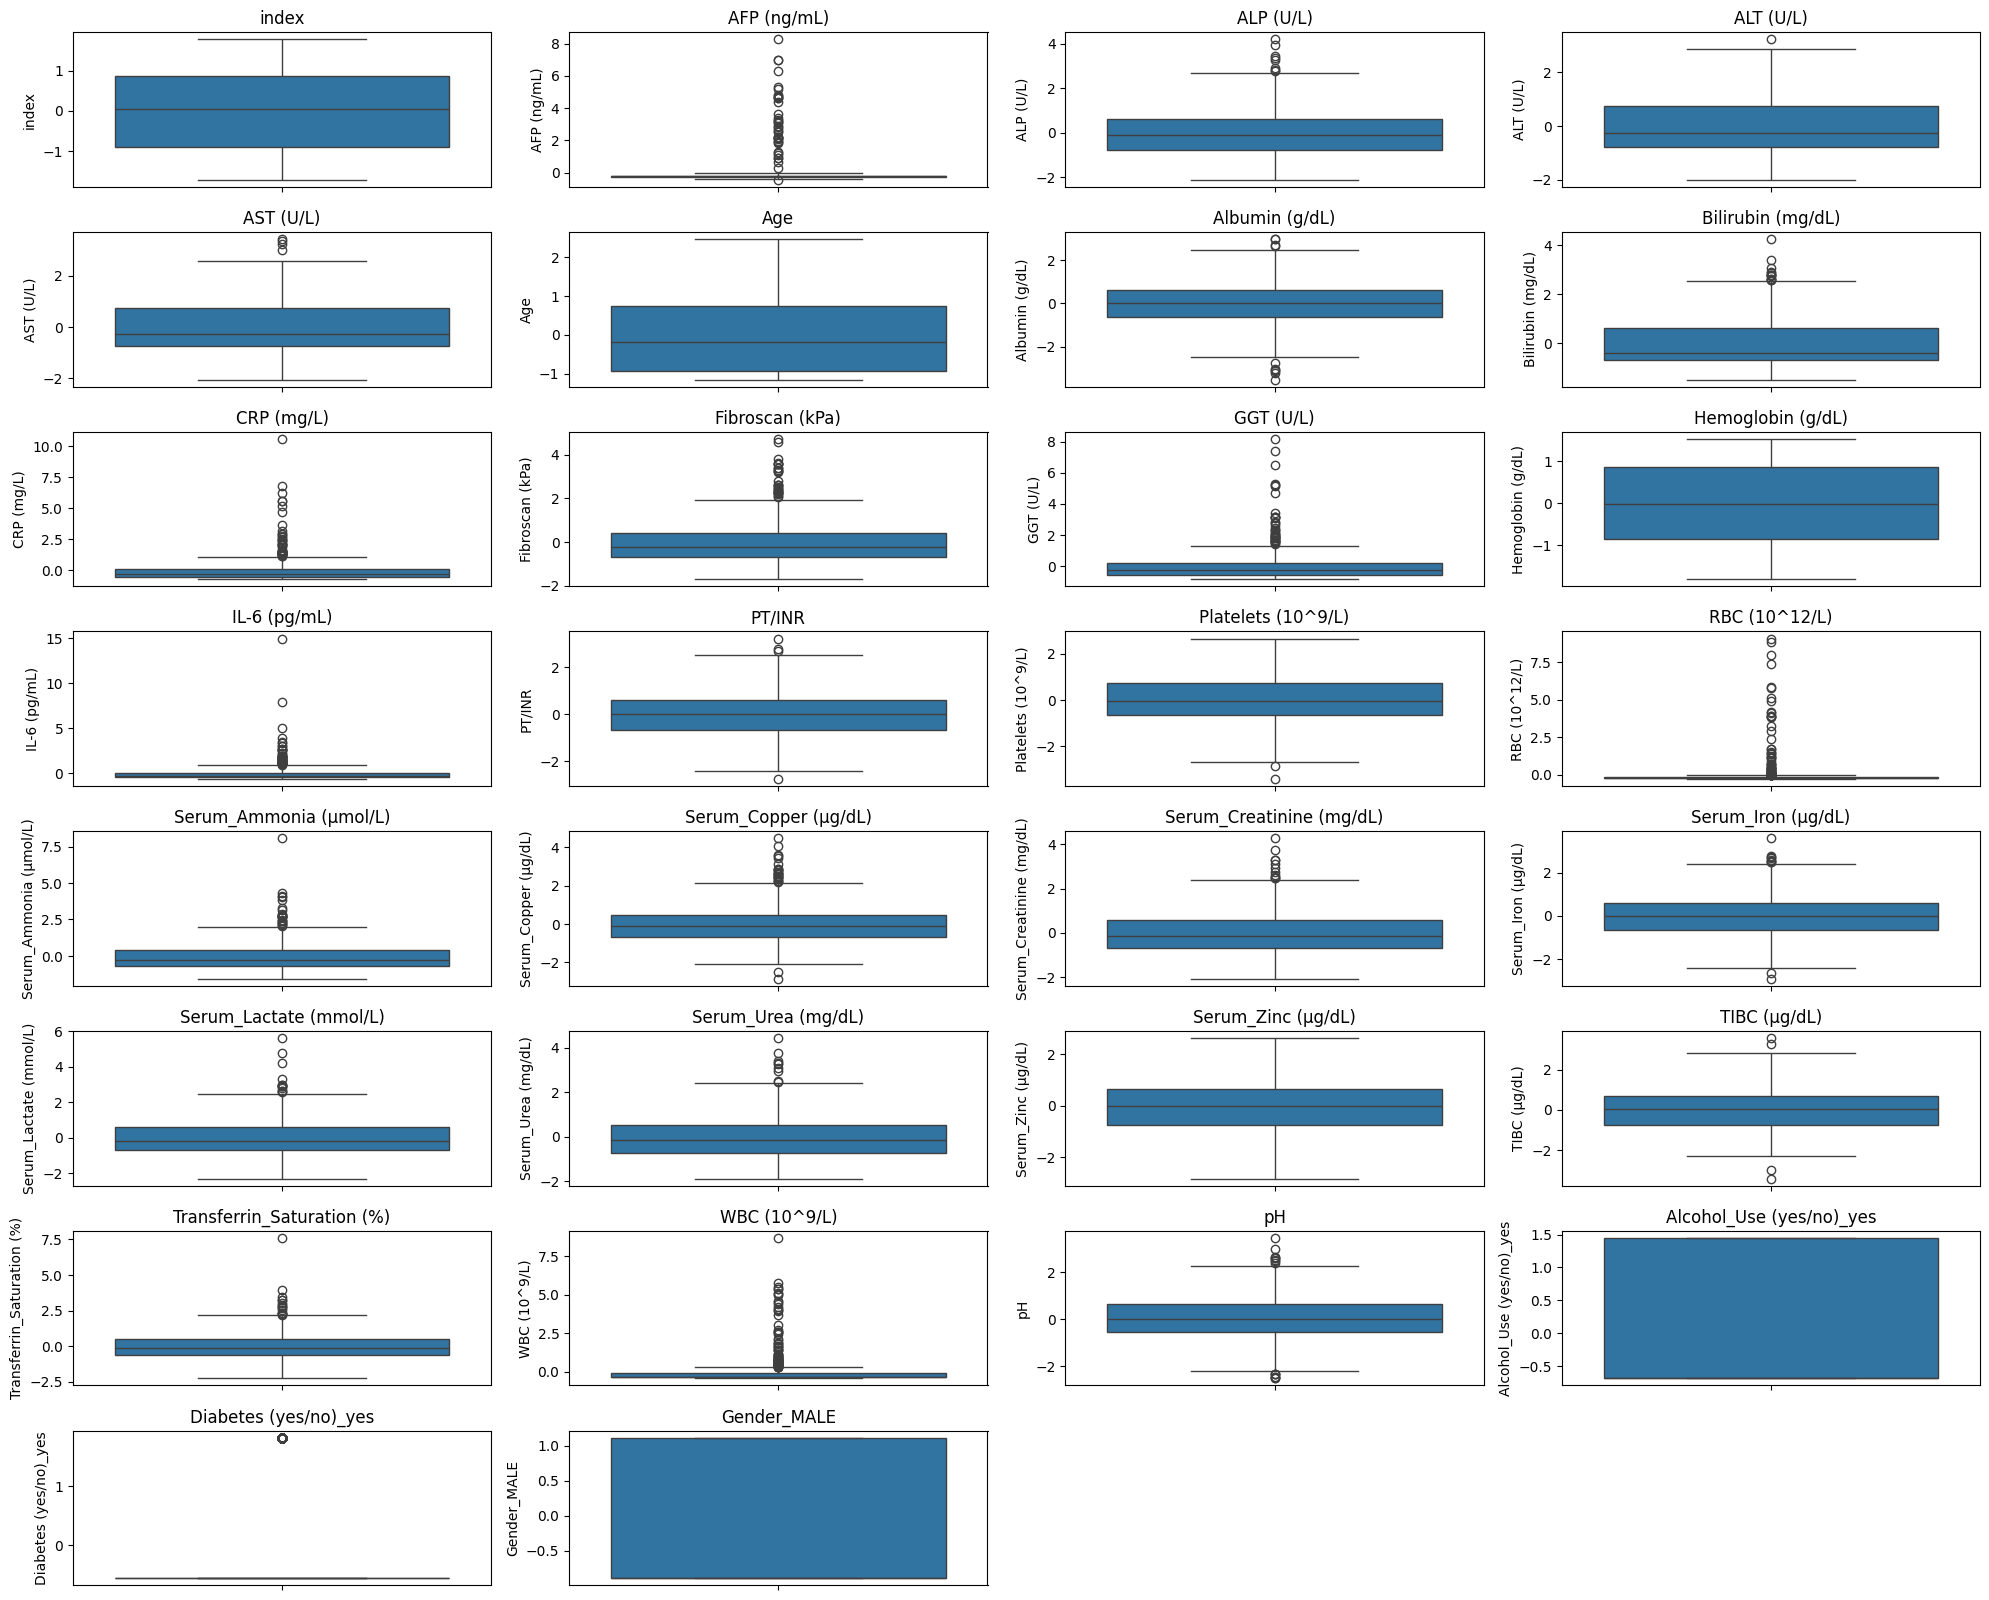

In [168]:
# Plotting the Boxplot for the uncleand dataset i.e X_train_sc_df
# ======================================================================
features = X_train_sc_df.columns[:-1]

plt.figure(figsize=(20, 60))

for i, column in enumerate(features):
    plt.subplot(len(features), 4, i + 1)
    sns.boxplot(y=X_train_sc_df[column])
    plt.title(column)
    plt.tight_layout()

plt.show()

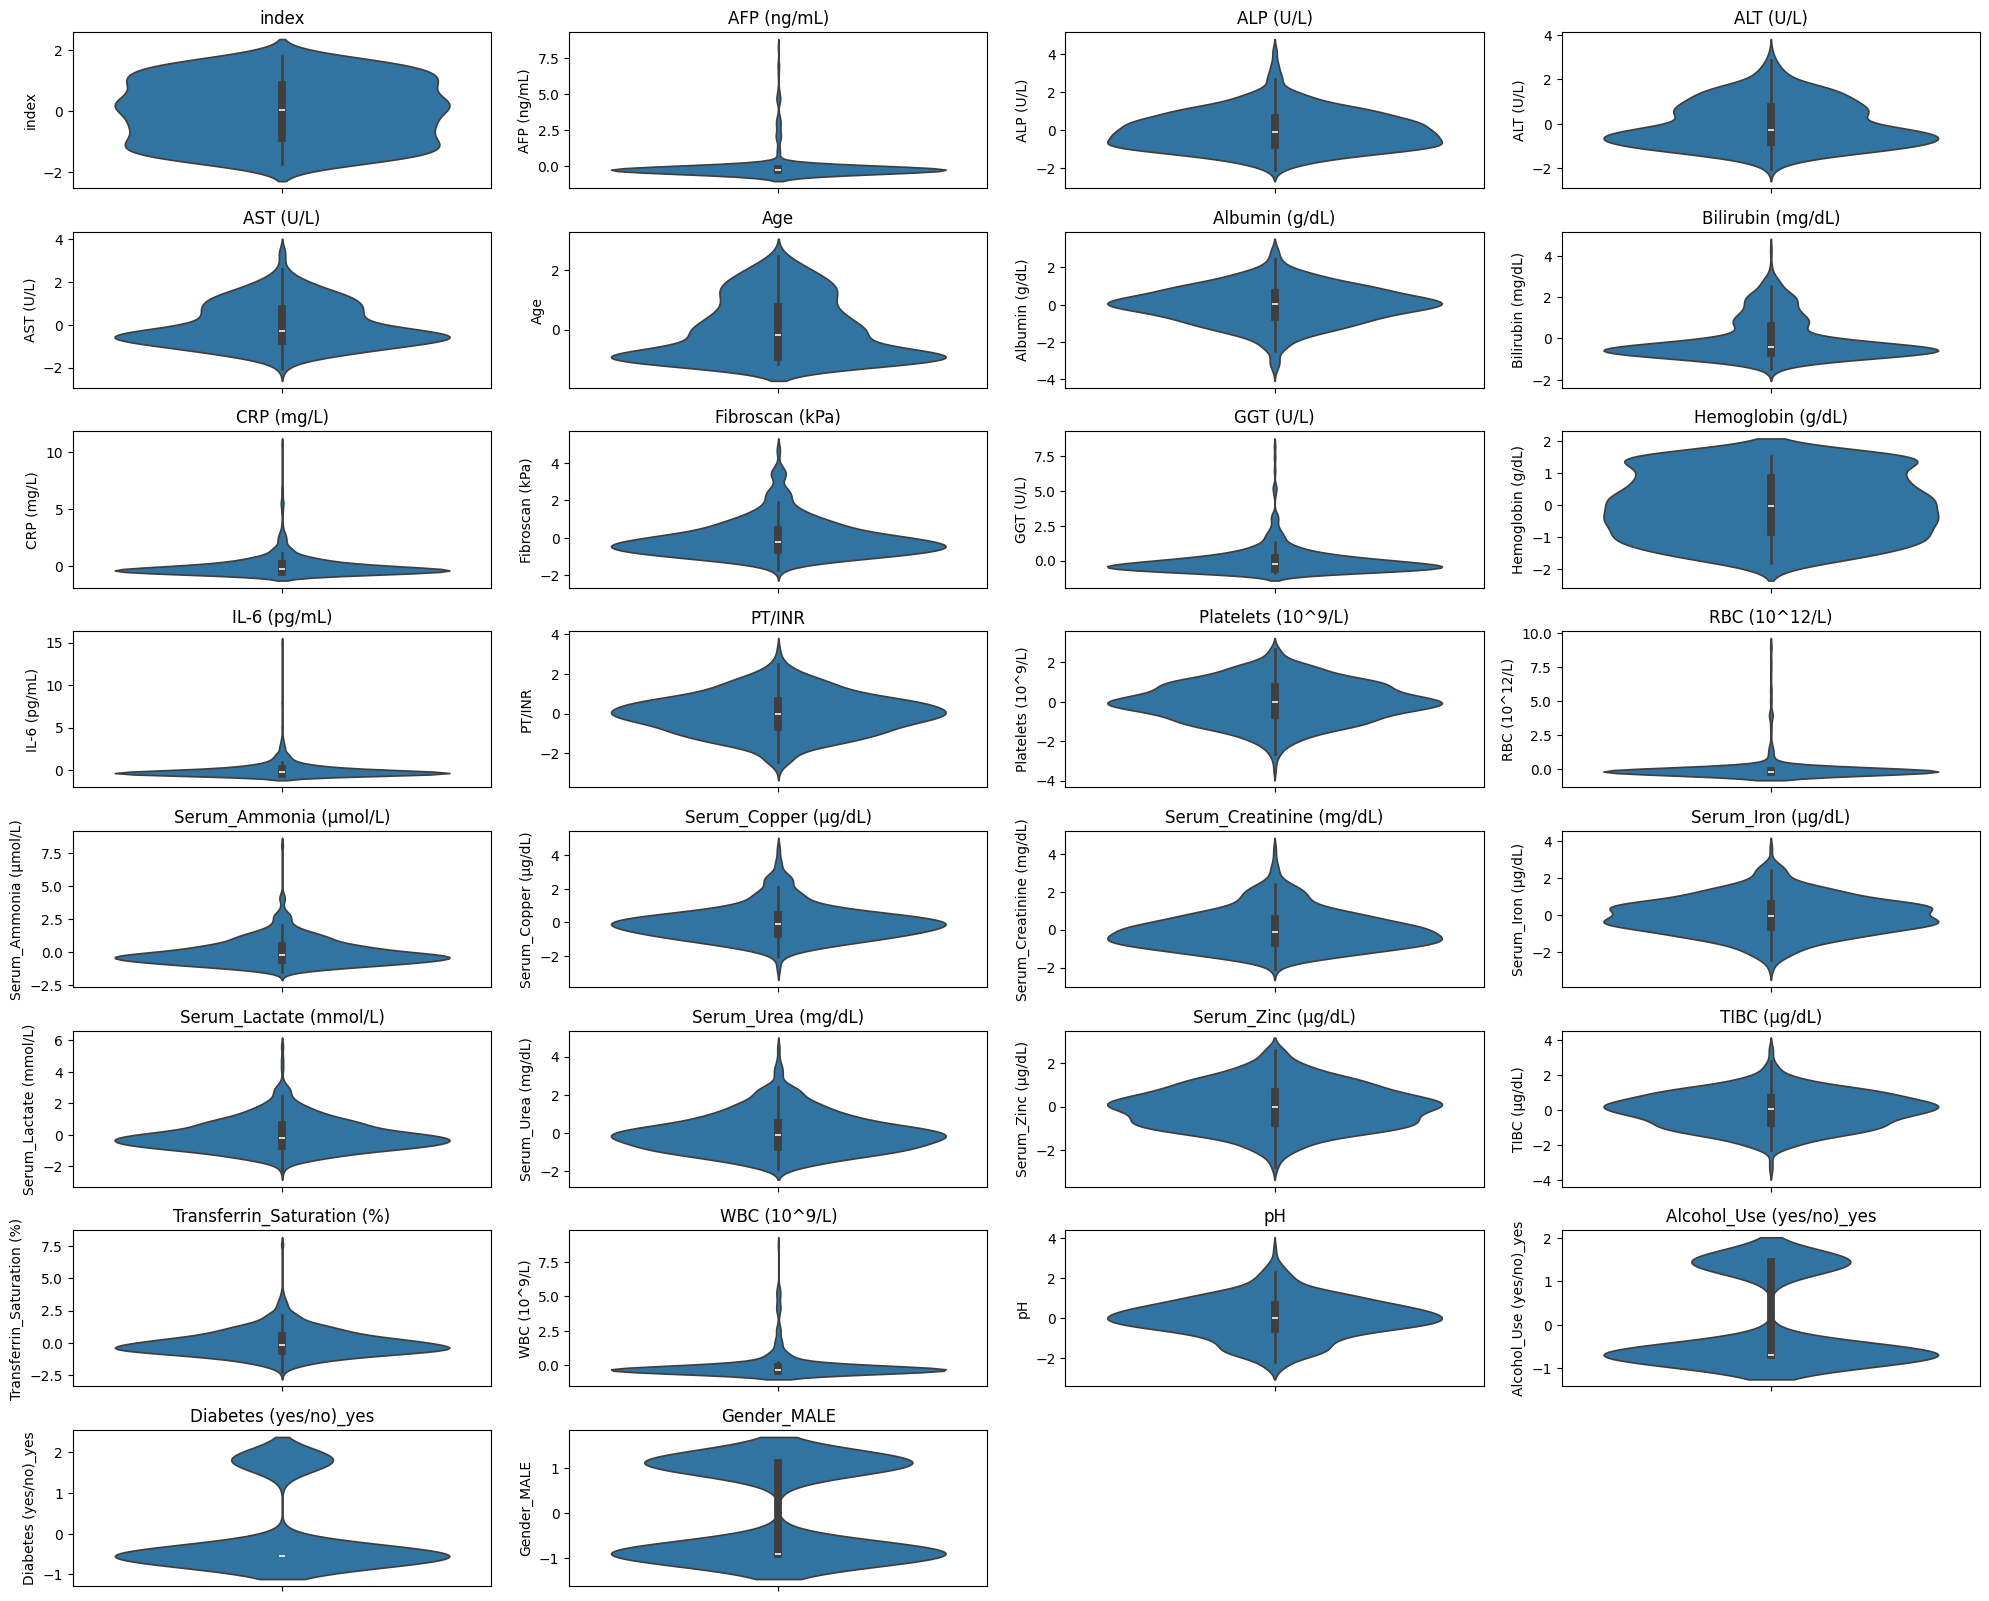

In [169]:
# Plotting the Violin plot for the uncleand dataset i.e X_train_sc_df
# ===================================================================
features = X_train_sc_df.columns[:-1]

plt.figure(figsize=(20, 60))

for i, column in enumerate(features):
    plt.subplot(len(features), 4, i + 1)
    sns.violinplot(y=X_train_sc_df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

#### PCA

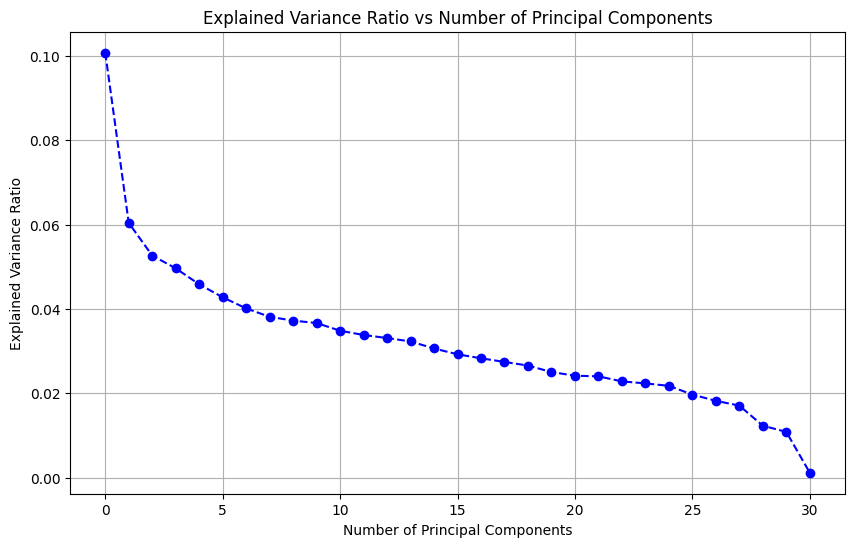

In [195]:
# Applying and plotting the PCA for the cleaned dataset
# =====================================================
pca = PCA()
X_train_cleaned_sc_pca = pca.fit_transform(X_train_cleaned_sc)
X_test_cleaned_sc_pca = pca.transform(X_test_cleaned_sc)

# Plotting the explained variance ratio with grid on the plot with line in the has point for each number of principal components
# ===========================================================================================================================
plt.figure(figsize=(10, 6))
plt.plot(pca.explained_variance_ratio_, marker='o', linestyle='--', color='b')
plt.grid()
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio vs Number of Principal Components')
plt.show()

In [196]:
# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Determine the number of components for 90%, 95%, and 99% of explained variance
thresholds = [0.9, 0.95, 0.99]
components_for_threshold = {}

for threshold in thresholds:
    components = np.argmax(cumulative_explained_variance >= threshold) + 1  # +1 since index is 0-based
    components_for_threshold[f"{int(threshold*100)}%"] = components

components_for_threshold

{'90%': 25, '95%': 27, '99%': 30}

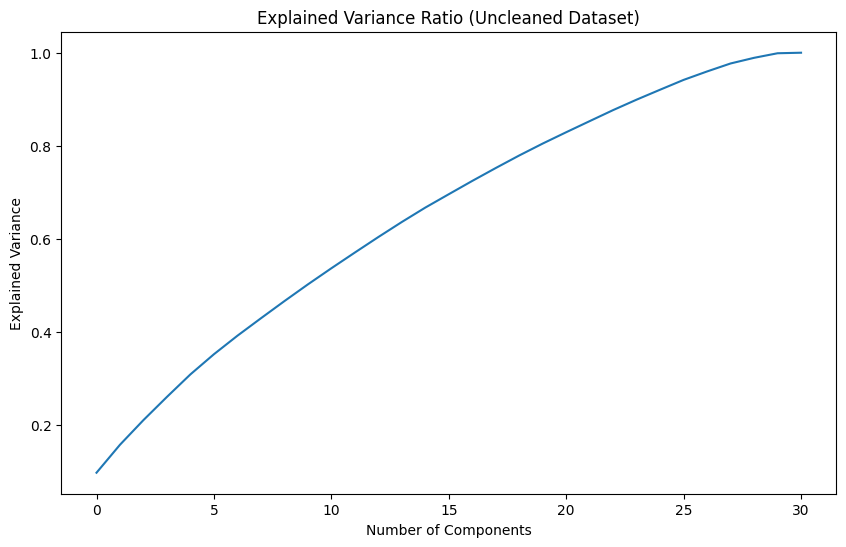

In [198]:
# Applying and plotting the PCA for the uncleand dataset
# =====================================================
pca2 = PCA()
X_train_sc_pca = pca2.fit_transform(X_train_sc)
X_test_sc_pca = pca2.transform(X_test_sc)

# Plotting the explained variance ratio
# ======================================
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca2.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance Ratio (Uncleaned Dataset)')
plt.show()

#### SFS

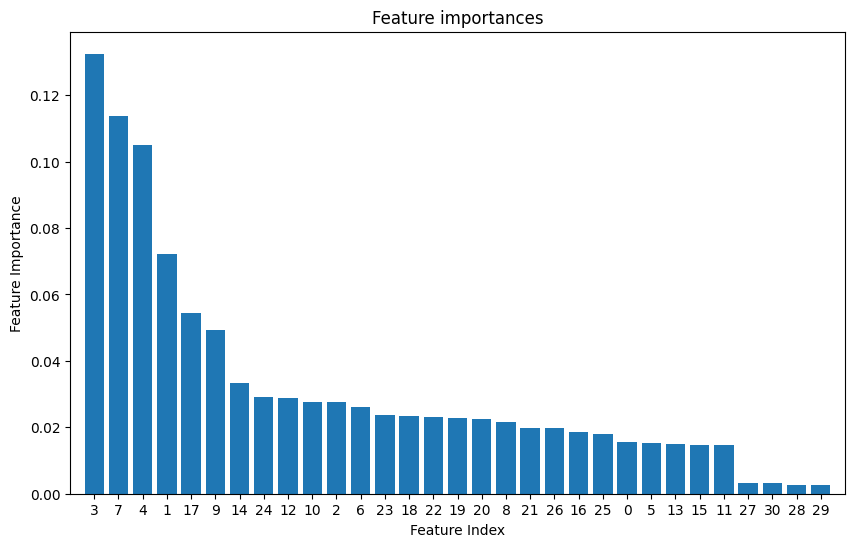

In [199]:
# Applying SFS for the cleaned dataset using the RandomForestClassifier without pipeline
# ======================================================================================
# Initialise the classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier
clf.fit(X_train_cleaned_sc, y_train_cleaned)

# Get feature importances
importances = clf.feature_importances_

# Get the names of the features sorted by importance
indices = np.argsort(importances)[::-1]

# Plot the feature importances of the forest
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X_train_cleaned_sc.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train_cleaned_sc.shape[1]), indices)
plt.xlim([-1, X_train_cleaned_sc.shape[1]])
plt.xlabel('Feature Index')
plt.ylabel('Feature Importance')
plt.show()



### Modelling

#### Pipelining with Kernel

In [218]:
# Defining the pipeline with kernel(SVC) and pca
# ==============================================
pipe_svc_pca = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('classifier', SVC())
])

# Defining the parameters for the grid search
# ===========================================
param_grid_svc_pca = {
    'pca__n_components': [0.9, 0.95, 0.99],
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

In [219]:
# Defining the grid search
# ========================
grid_search_svc_pca = GridSearchCV(estimator=pipe_svc_pca, param_grid=param_grid_svc_pca, scoring='accuracy', cv=5)

In [220]:
# Fitting the grid search
# =======================
grid_search_svc_pca.fit(X_train_cleaned, y_train_cleaned)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()), ('classifier', SVC())]),
             param_grid={'classifier__C': [0.1, 1, 10],
                         'classifier__kernel': ['linear', 'poly', 'rbf',
                                                'sigmoid'],
                         'pca__n_components': [0.9, 0.95, 0.99]},
             scoring='accuracy')

In [221]:
# Printing the best parameters
# ============================
print(f"Best parameters: {grid_search_svc_pca.best_params_}")

# Printing the best score
# ========================
print(f"Best score: {grid_search_svc_pca.best_score_}")

Best parameters: {'classifier__C': 1, 'classifier__kernel': 'sigmoid', 'pca__n_components': 0.9}
Best score: 0.7958913771821547


In [222]:
# Defining the pipeline with kernel(SVC) and lda
# ==============================================
pipe_svc_lda = Pipeline([
    ('scaler', StandardScaler()),
    ('lda', LDA()),
    ('classifier', SVC())
])

# Defining the parameters for the grid search
# ===========================================
param_grid_svc_lda= {
    'lda__n_components': [1, 2],
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}


In [223]:
# Defining the grid search
# ========================
grid_search_svc_lda = GridSearchCV(estimator=pipe_svc_lda, param_grid=param_grid_svc_lda, scoring='accuracy', cv=5)

In [224]:
# Fitting the grid search
# =======================
grid_search_svc_lda.fit(X_train_cleaned, y_train_cleaned)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lda', LinearDiscriminantAnalysis()),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [0.1, 1, 10],
                         'classifier__kernel': ['linear', 'poly', 'rbf',
                                                'sigmoid'],
                         'lda__n_components': [1, 2]},
             scoring='accuracy')

In [225]:
# Printing the best parameters
# ============================
print(f"Best parameters: {grid_search_svc_lda.best_params_}")

# Printing the best score
# ========================
print(f"Best score: {grid_search_svc_lda.best_score_}")

Best parameters: {'classifier__C': 1, 'classifier__kernel': 'rbf', 'lda__n_components': 2}
Best score: 0.6310350908129078


##### Pipelining with Regularization

In [226]:
# Defining the pipeline with Regulization(LogisticRegression) and pca
# ===================================================================
pipe_lr_pca = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('classifier', LogisticRegression())
])

# Defining the parameters for the grid search
# ===========================================
param_grid_lr_pca = {
    'pca__n_components': [0.9, 0.95, 0.99],
    'classifier__C': [0.1, 1, 10],
    'classifier__penalty': ['l1', 'l2']
}

In [227]:
# Defining the grid search
# ========================
grid_search_lr_pca = GridSearchCV(estimator=pipe_lr_pca, param_grid=param_grid_lr_pca, scoring='accuracy', cv=5)

In [228]:
# Fitting the grid search
# =======================
grid_search_lr_pca.fit(X_train_cleaned, y_train_cleaned)

/Users/jony/opt/anaconda3/envs/dat200_env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:542: FitFailedWarning: 
45 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/jony/opt/anaconda3/envs/dat200_env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/jony/opt/anaconda3/envs/dat200_env/lib/python3.10/site-packages/sklearn/base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/jony/opt/anaconda3/envs/dat200_env/lib/python3.10/site-packages/sklear

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('classifier', LogisticRegression())]),
             param_grid={'classifier__C': [0.1, 1, 10],
                         'classifier__penalty': ['l1', 'l2'],
                         'pca__n_components': [0.9, 0.95, 0.99]},
             scoring='accuracy')

In [229]:
# Printing the best parameters
# ============================
print(f"Best parameters: {grid_search_lr_pca.best_params_}")

# Printing the best score
# ========================
print(f"Best score: {grid_search_lr_pca.best_score_}")

Best parameters: {'classifier__C': 0.1, 'classifier__penalty': 'l2', 'pca__n_components': 0.9}
Best score: 0.7827896314582967


In [230]:
# Defining the pipeline with Regulization(LogisticRegression) and lda
# ===================================================================
pipe_lr_lda = Pipeline([
    ('scaler', StandardScaler()),
    ('lda', LDA()),
    ('classifier', LogisticRegression())
])

# Defining the parameters for the grid search
# ===========================================
param_grid_lr_lda = {
    'lda__n_components': [1, 2],
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2']
}

In [231]:
# Defining the grid search
# ========================
grid_search_lr_lda = GridSearchCV(estimator=pipe_lr_lda, param_grid=param_grid_lr_lda, scoring='accuracy', cv=5)

In [232]:
# Fitting the grid search
# =======================
grid_search_lr_lda.fit(X_train_cleaned, y_train_cleaned)

/Users/jony/opt/anaconda3/envs/dat200_env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:542: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/jony/opt/anaconda3/envs/dat200_env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/jony/opt/anaconda3/envs/dat200_env/lib/python3.10/site-packages/sklearn/base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/jony/opt/anaconda3/envs/dat200_env/lib/python3.10/site-packages/sklea

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lda', LinearDiscriminantAnalysis()),
                                       ('classifier', LogisticRegression())]),
             param_grid={'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'classifier__penalty': ['l1', 'l2'],
                         'lda__n_components': [1, 2]},
             scoring='accuracy')

In [233]:
# Printing the best parameters
# ============================
print(f"Best parameters: {grid_search_lr_lda.best_params_}")

# Printing the best score
# ========================
print(f"Best score: {grid_search_lr_lda.best_score_}")

Best parameters: {'classifier__C': 10, 'classifier__penalty': 'l2', 'lda__n_components': 2}
Best score: 0.6385646270499029


In [234]:
# Defining the pipeline with RandomForestClassifier and pca
# =========================================================
pipe_rf_pca = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('classifier', RandomForestClassifier())
])

# Defining the parameters for the grid search
# ===========================================
param_grid_rf_pca = {
    'pca__n_components': [0.9, 0.95, 0.99],
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [5, 10, 15, 20]
}

# Defining the grid search
# ========================
grid_search_rf_pca = GridSearchCV(estimator=pipe_rf_pca, param_grid=param_grid_rf_pca, scoring='accuracy', cv=5)

# Fitting the grid search(for cleaned dataset)
# ============================================
grid_search_rf_pca.fit(X_train_cleaned, y_train_cleaned)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('classifier',
                                        RandomForestClassifier())]),
             param_grid={'classifier__max_depth': [5, 10, 15, 20],
                         'classifier__n_estimators': [100, 200, 300],
                         'pca__n_components': [0.9, 0.95, 0.99]},
             scoring='accuracy')

In [235]:
# Printing the best parameters
# ============================
print(f"Best parameters: {grid_search_rf_pca.best_params_}")

# Printing the best score
# ========================
print(f"Best score: {grid_search_rf_pca.best_score_}")

Best parameters: {'classifier__max_depth': 20, 'classifier__n_estimators': 200, 'pca__n_components': 0.95}
Best score: 0.7396755422324105


### Final evaluation

### Kaggle submission